#Prediccion de Diabetes con uso de redes neuronales función sigmoide (Salidas binarias) y softmax (Salidas multiple opcion)
##Jose Israel Mendoza Monreal 173389
### Inteligencia Artificial 2


##Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Se importan las librerias panda, numpy e seaborn para manejos de datos

In [ ]:
import matplotlib.pyplot as plt

Se importal librerias matplot para visualizacion de informacion utilitaria

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.utils import resample

Se importan las librerias que nos permiten utilizar metricas de clasificacion, preposesamiento de datos(normalizacion de datos) y ayuda de biparticion de informacion de entrenamiento y prueba

In [ ]:
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

%matplotlib inline
plt.style.use('fivethirtyeight')

Se importan las librerias de redes neuronales, y definicion de modelos, asi como tambien funciones de entrenamiento Adam como optimizador y callbacks que nos permiten limitar el estancamiento de aprendizaje

#Aprendizaje Sigmoide y Set de datos simple

##Importe de datos

In [ ]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/diabetes.csv', delimiter=',')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Se descarga el set de datos y se importa como una variable para poder trabajar con este.

##Analisis de datos

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Se revisa el tipo de informacion asi como tambien las listas totales de entradas que existen en el set de datos.
Tambien para revisar si el set de datos le falta alguna informacion

In [ ]:
diabetes_df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

Se utiliza para calcular la correlación entre columnas en un DataFrame. La correlación es una medida estadística que describe la relación entre dos variables. El valor de la correlación puede oscilar entre -1 y 1, donde:

1 indica una correlación positiva perfecta, lo que significa que a medida que una variable aumenta, la otra también lo hace de manera proporcional.

-1 indica una correlación negativa perfecta, lo que significa que a medida que una variable aumenta, la otra disminuye de manera proporcional.
0 indica una falta de correlación, es decir, que no hay una relación lineal entre las dos variables.


<Axes: >

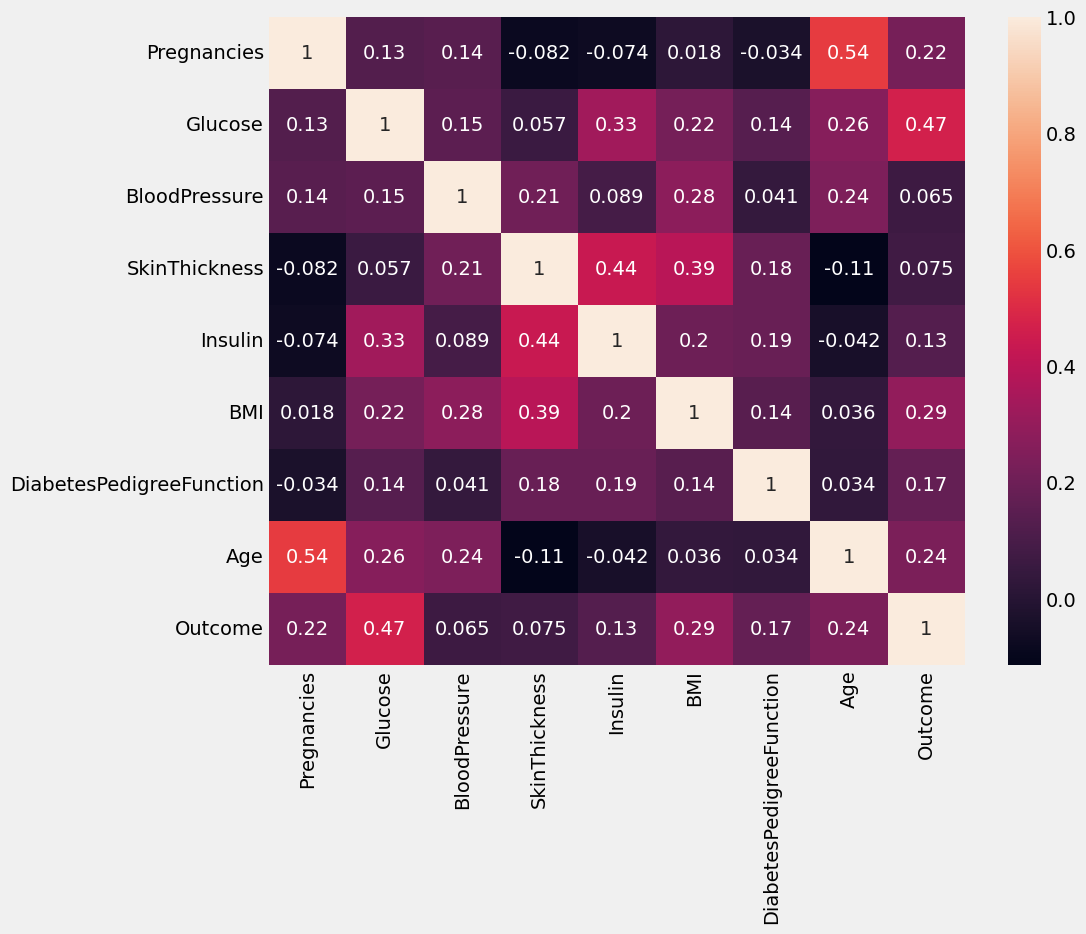

In [ ]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(diabetes_df.corr(), annot=True, ax=ax)

Usando seaborn, podemos realizar un mapa de calor usando las variables y la funcion de correlacion para inferir cuales son las variables que tienen mayor influencia dentro de otra variable

Dentro del mapa de calor se puede ver que existe una correlacion entre la glucosa fuerte entre la clasificacion de diabetes, asi como tambien el indice de masa corporal, edad y embarazos

<Axes: xlabel='Outcome', ylabel='count'>

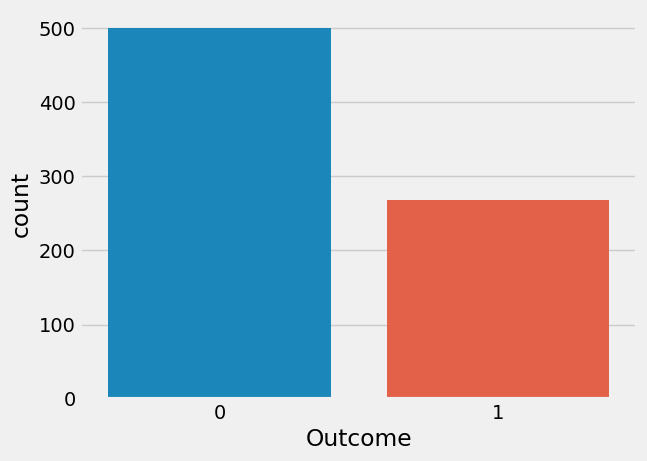

In [ ]:
sns.countplot(x=diabetes_df.Outcome)


Se realiza un conteo de la variable salida(diabetes o no diabetes)

<Axes: xlabel='Outcome', ylabel='Age'>

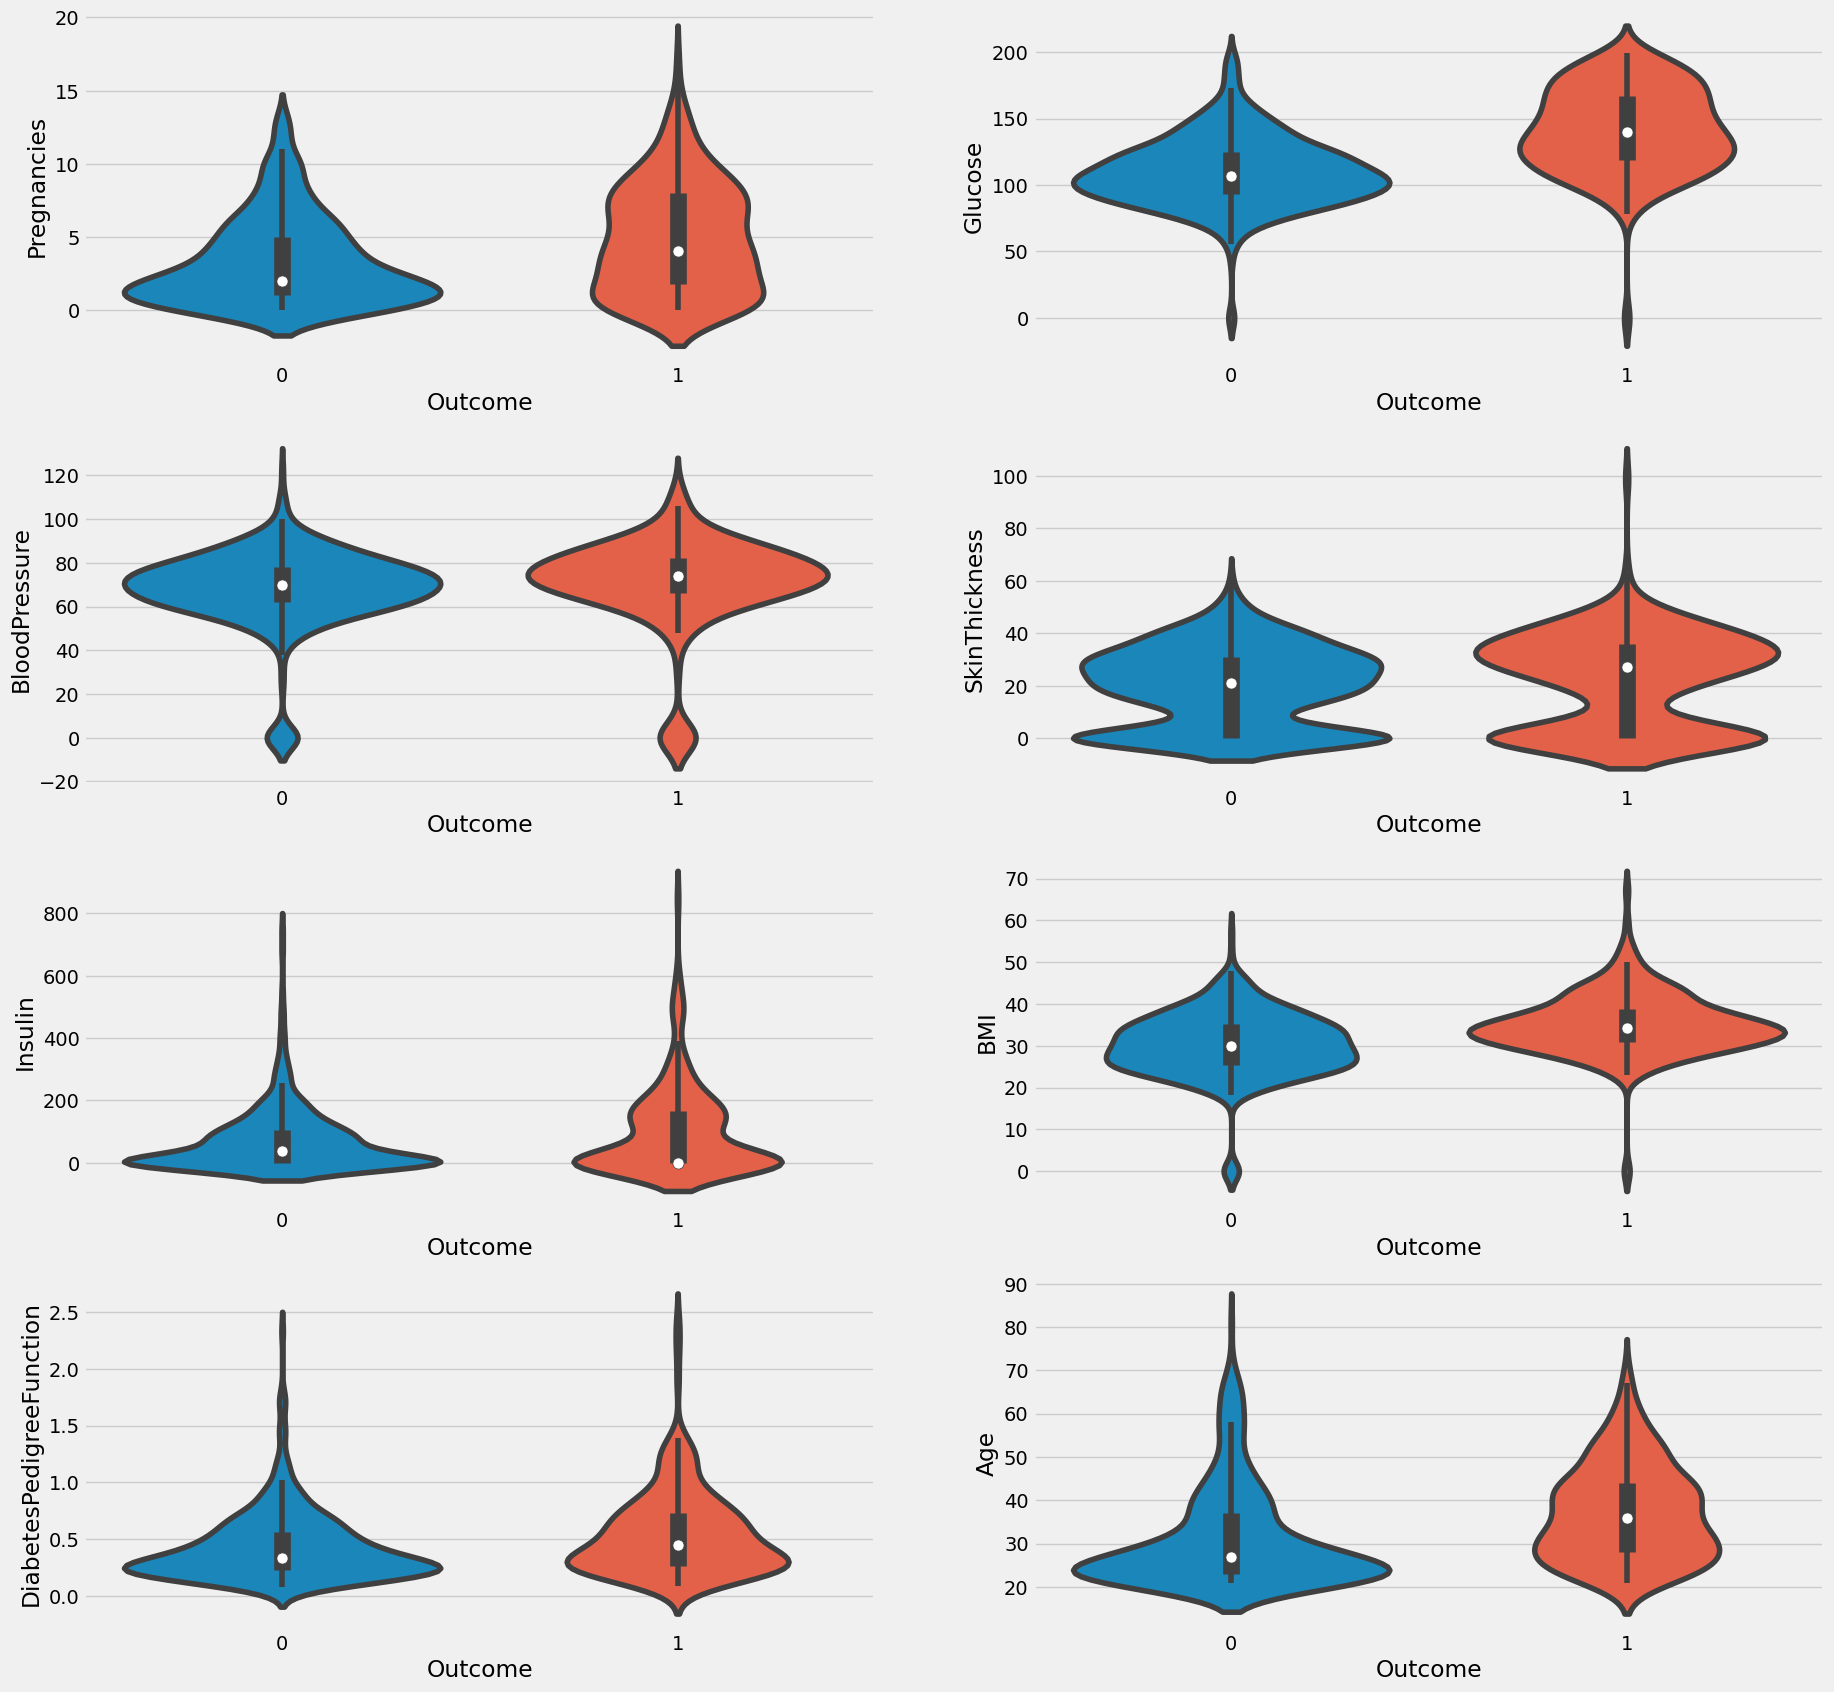

In [ ]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Pregnancies, ax=axes[0,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Glucose, ax=axes[0,1])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.BloodPressure, ax=axes[1,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.SkinThickness, ax=axes[1,1])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Insulin, ax=axes[2,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.BMI, ax=axes[2,1])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Age, ax=axes[3,1])

Con ayuda de seaborn realizamos un diagrama de violin en relacion a la probabilidad existente de la variable diabetes.
 Un diagrama de violín es un gráfico estadístico para comparar distribuciones de probabilidad

In [ ]:
column_names = diabetes_df.columns
column_names = column_names.drop('Outcome')
for name in column_names:
    print('{}\n'.format(name))
    print(diabetes_df.groupby(['Outcome'])[name].mean())
    print()

Pregnancies

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64

Glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

BloodPressure

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

SkinThickness

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64

Insulin

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64

BMI

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

DiabetesPedigreeFunction

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

Age

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64



Utilizando la media aritmetica(mean) podemos concluir lo siguiente
En el set de datos, la gente diagnosticada con diabetes posee mayores valores por cada atributo

<ipython-input-177-98e0e558ae35>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Pregnancies, ax=axes[0,0])
<ipython-input-177-98e0e558ae35>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Glucose, ax=axes[0,1])
<ipython-input-177-98e0e558ae35>:4: UserWarning: 

`distpl

<Axes: xlabel='Age', ylabel='Density'>

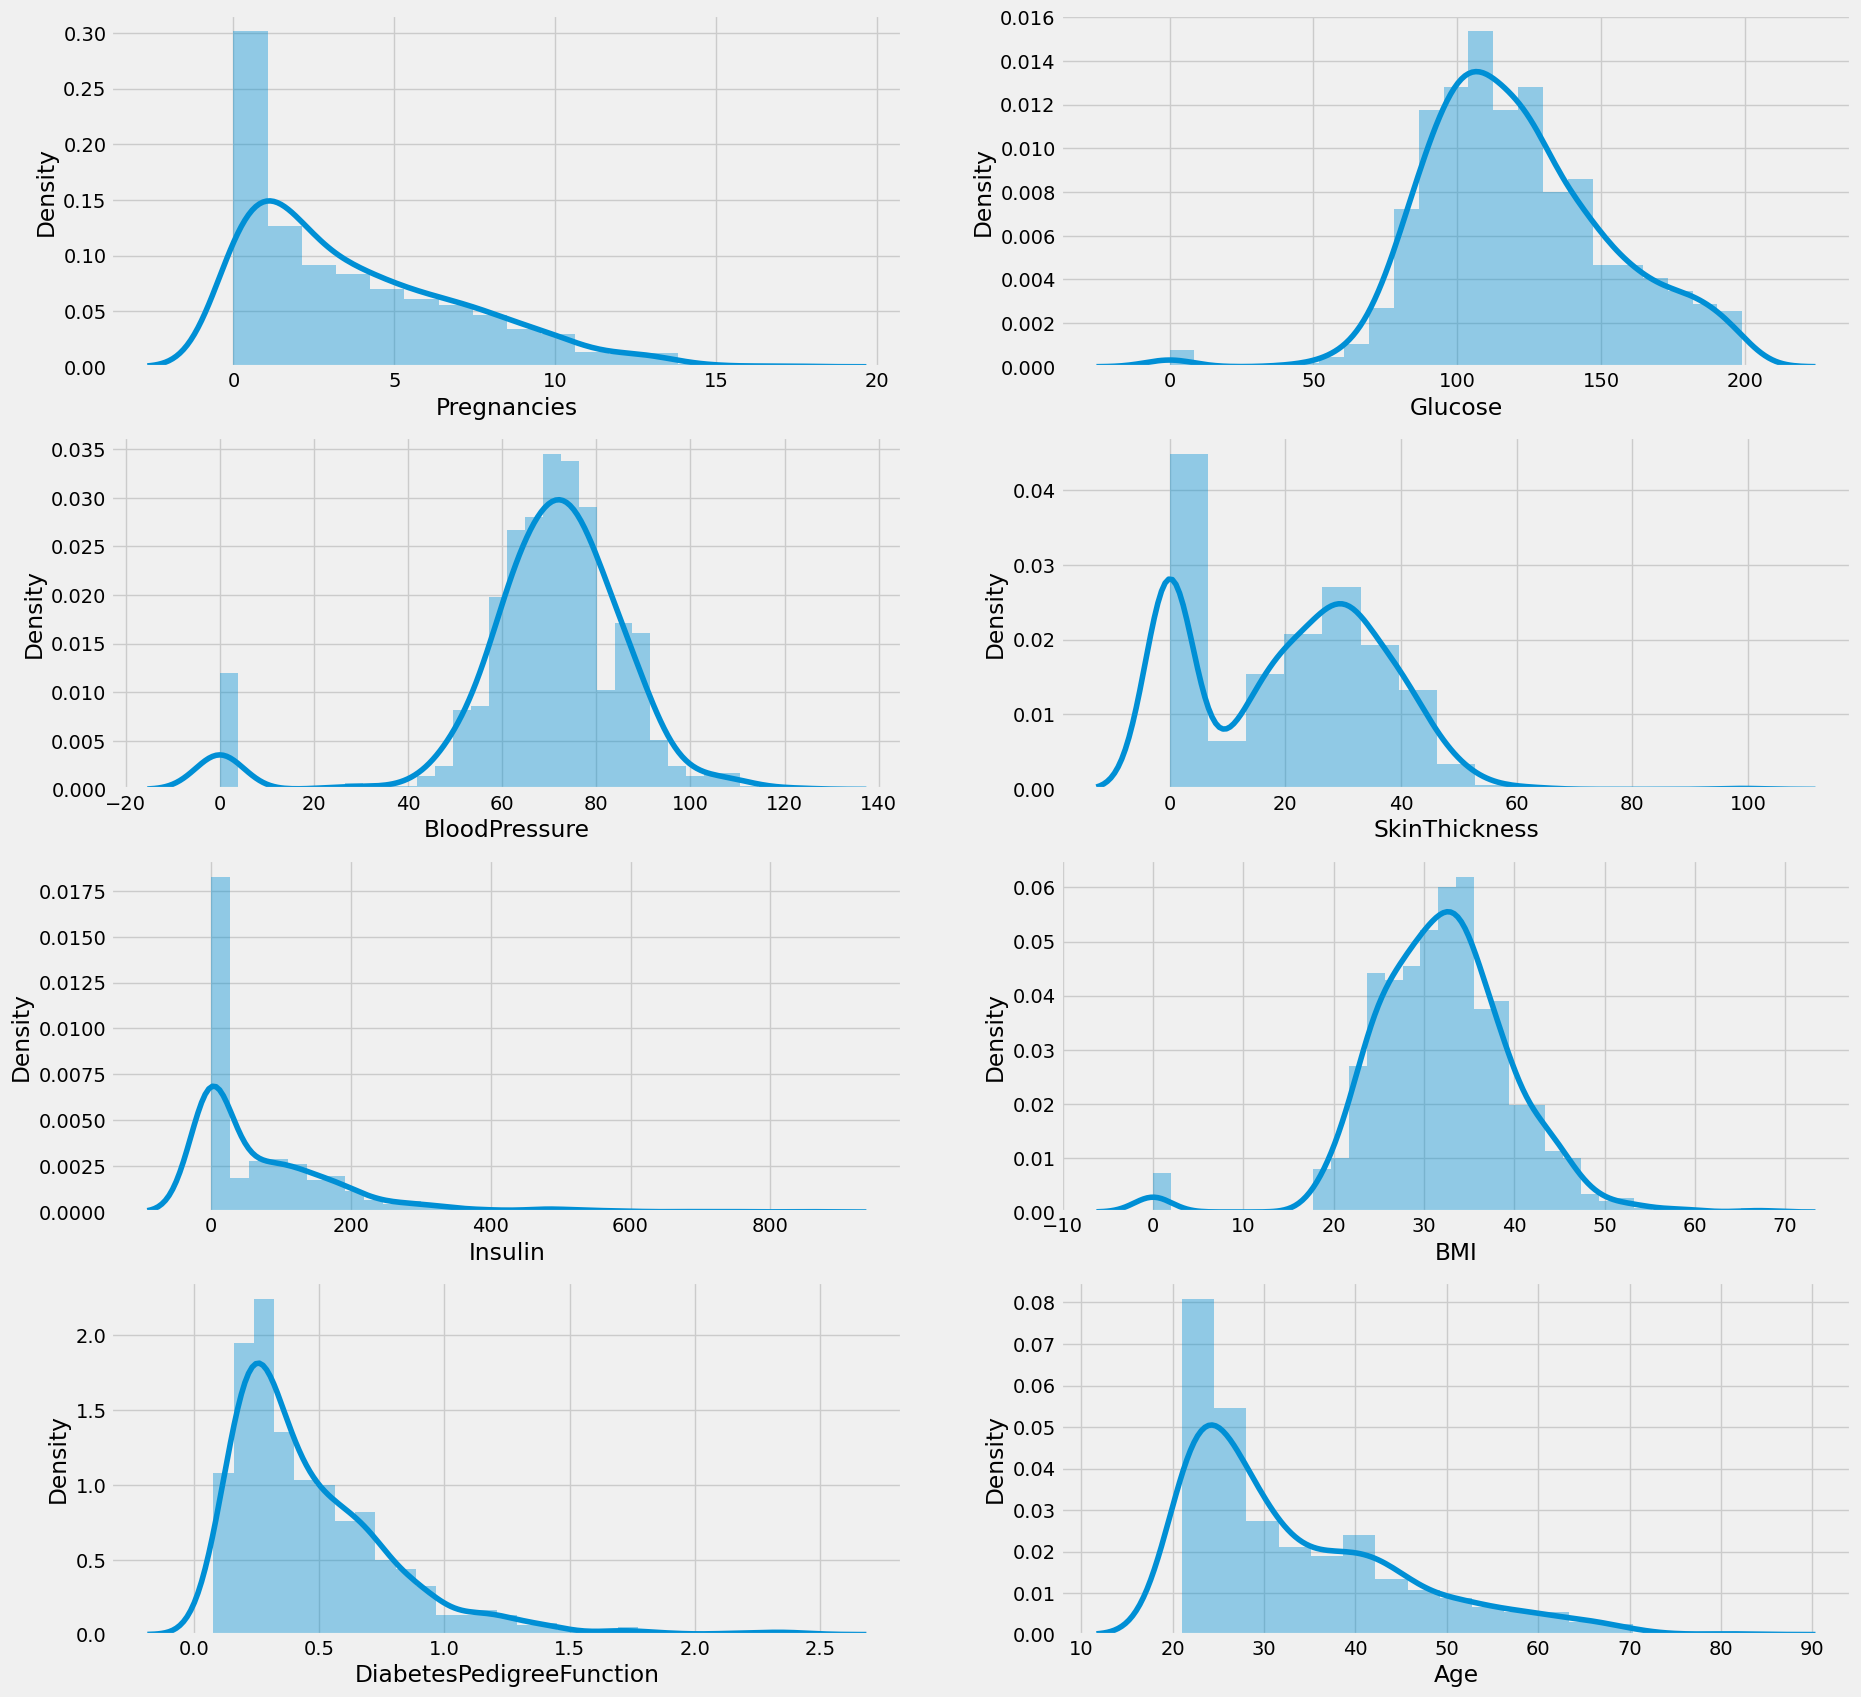

In [ ]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(diabetes_df.Pregnancies, ax=axes[0,0])
sns.distplot(diabetes_df.Glucose, ax=axes[0,1])
sns.distplot(diabetes_df.BloodPressure, ax=axes[1,0])
sns.distplot(diabetes_df.SkinThickness, ax=axes[1,1])
sns.distplot(diabetes_df.Insulin, ax=axes[2,0])
sns.distplot(diabetes_df.BMI, ax=axes[2,1])
sns.distplot(diabetes_df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(diabetes_df.Age, ax=axes[3,1])

Aqui podemos visualizar la distribucion de valores que existen dentro del set de datos, a pesar de que no hay valores con NaN, algunos datos estan registrado como 0
Estos son Skin Thickness, Insulin, Blood Pressure, Glucose y BMI

###Reemplazo de valores erroneos

In [ ]:
diabetes_df.SkinThickness.replace(0, diabetes_df.SkinThickness.median(), inplace=True)
diabetes_df.Insulin.replace(0, diabetes_df.Insulin.median(), inplace=True)
diabetes_df.Glucose.replace(0, diabetes_df.Glucose.median(), inplace=True)
diabetes_df.BloodPressure.replace(0, diabetes_df.BloodPressure.median(), inplace=True)
diabetes_df.BMI.replace(0, diabetes_df.BMI.median(), inplace=True)

Reemplazamos estos valores utilizando el valor mediano de todos los valores para ajustar el set de datos.

<ipython-input-179-98e0e558ae35>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Pregnancies, ax=axes[0,0])
<ipython-input-179-98e0e558ae35>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Glucose, ax=axes[0,1])
<ipython-input-179-98e0e558ae35>:4: UserWarning: 

`distpl

<Axes: xlabel='Age', ylabel='Density'>

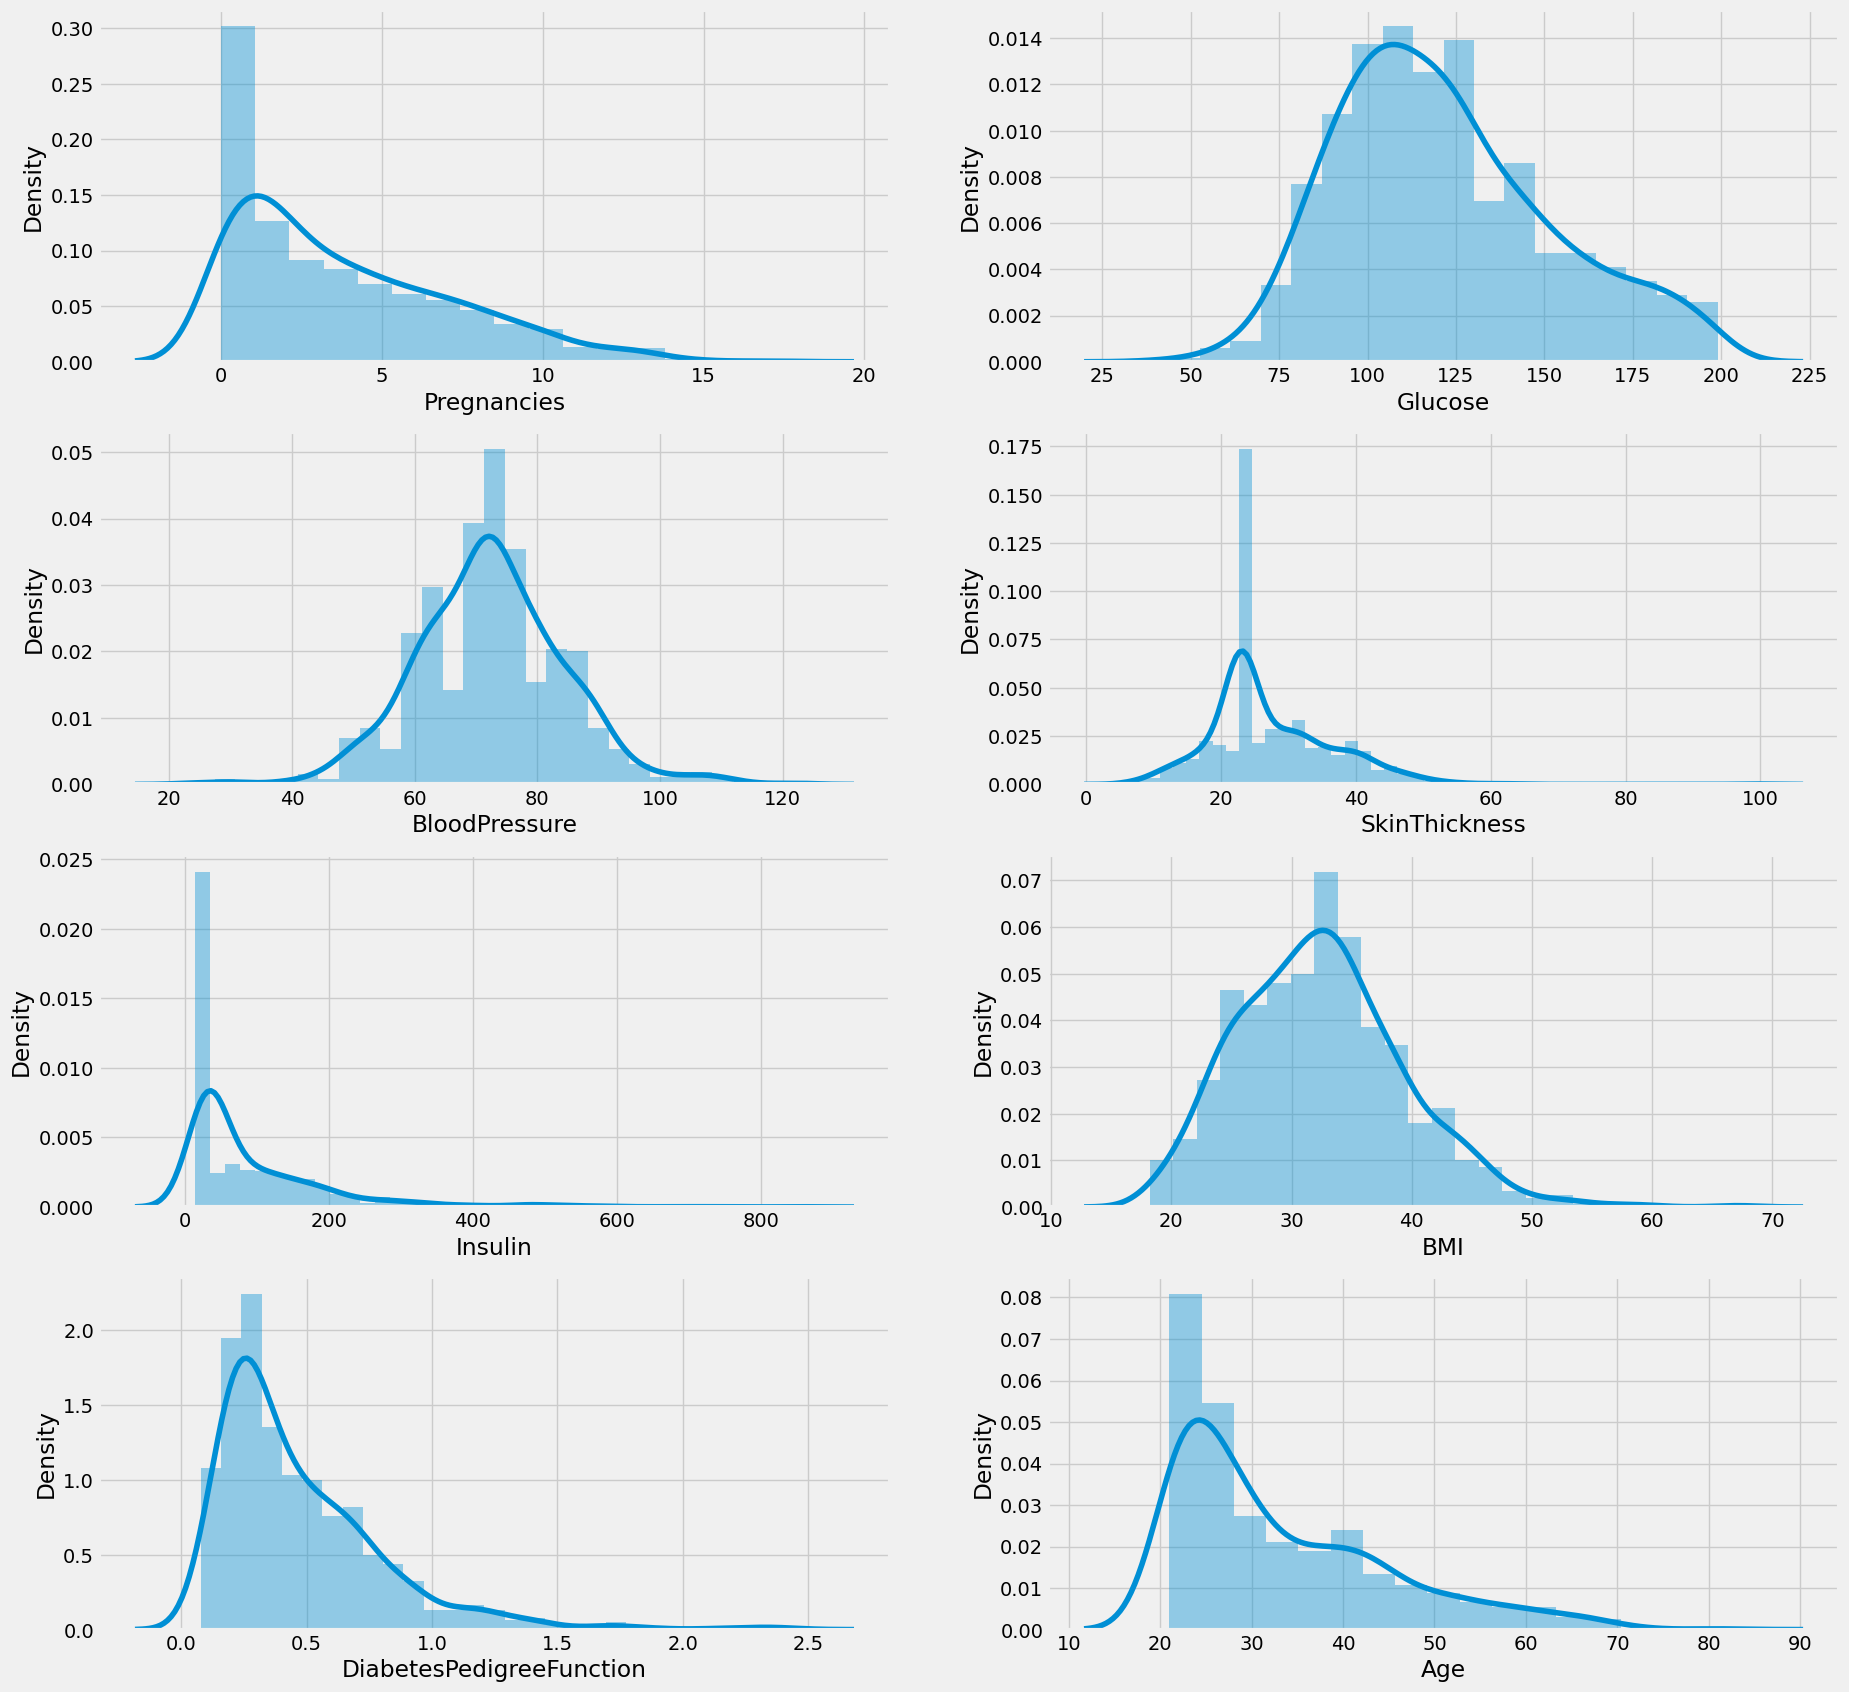

In [ ]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(diabetes_df.Pregnancies, ax=axes[0,0])
sns.distplot(diabetes_df.Glucose, ax=axes[0,1])
sns.distplot(diabetes_df.BloodPressure, ax=axes[1,0])
sns.distplot(diabetes_df.SkinThickness, ax=axes[1,1])
sns.distplot(diabetes_df.Insulin, ax=axes[2,0])
sns.distplot(diabetes_df.BMI, ax=axes[2,1])
sns.distplot(diabetes_df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(diabetes_df.Age, ax=axes[3,1])

Una vez reemplazados los valores codificados como 0, las graficas de los valores son las siguientes

<Axes: >

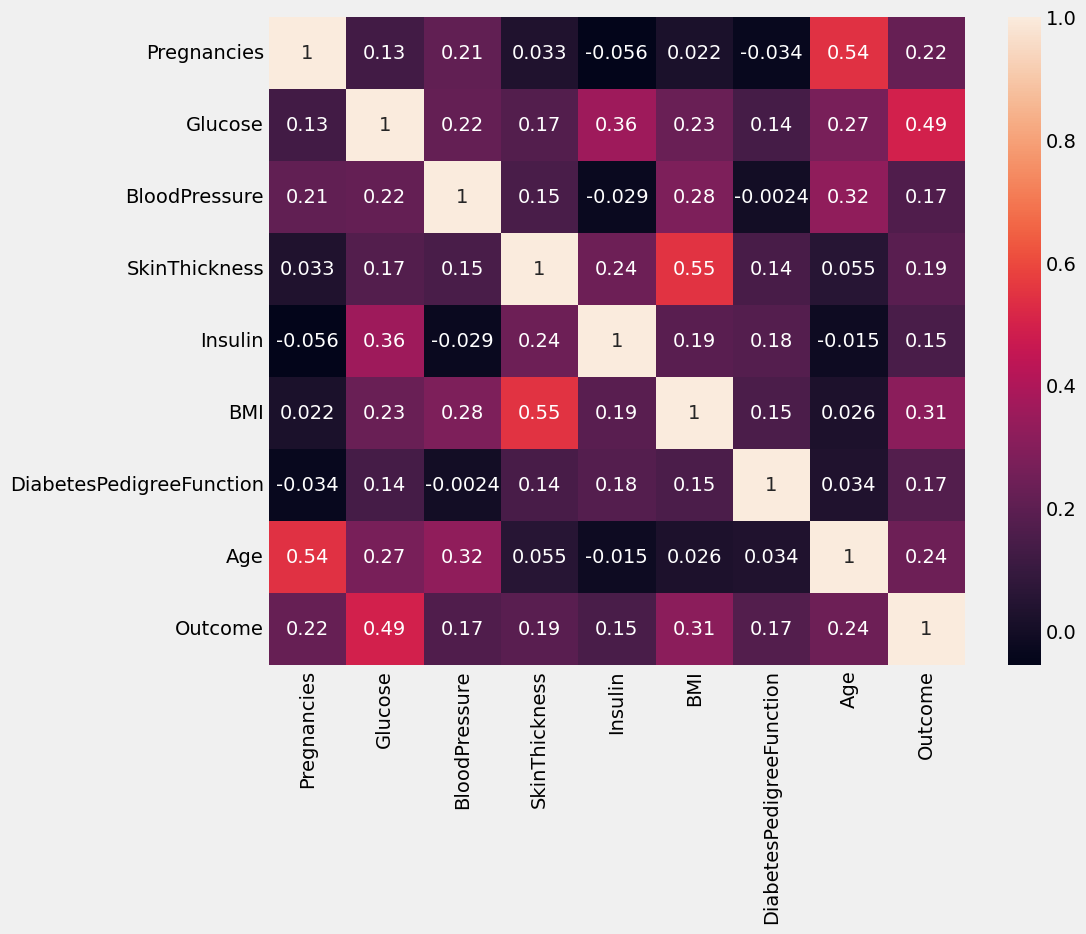

In [ ]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(diabetes_df.corr(), annot=True, ax=ax)

Una vez reemplazados los valores codificados como 0, los cambios en el mapa de calor son los siguientes

<Axes: xlabel='Outcome', ylabel='Age'>

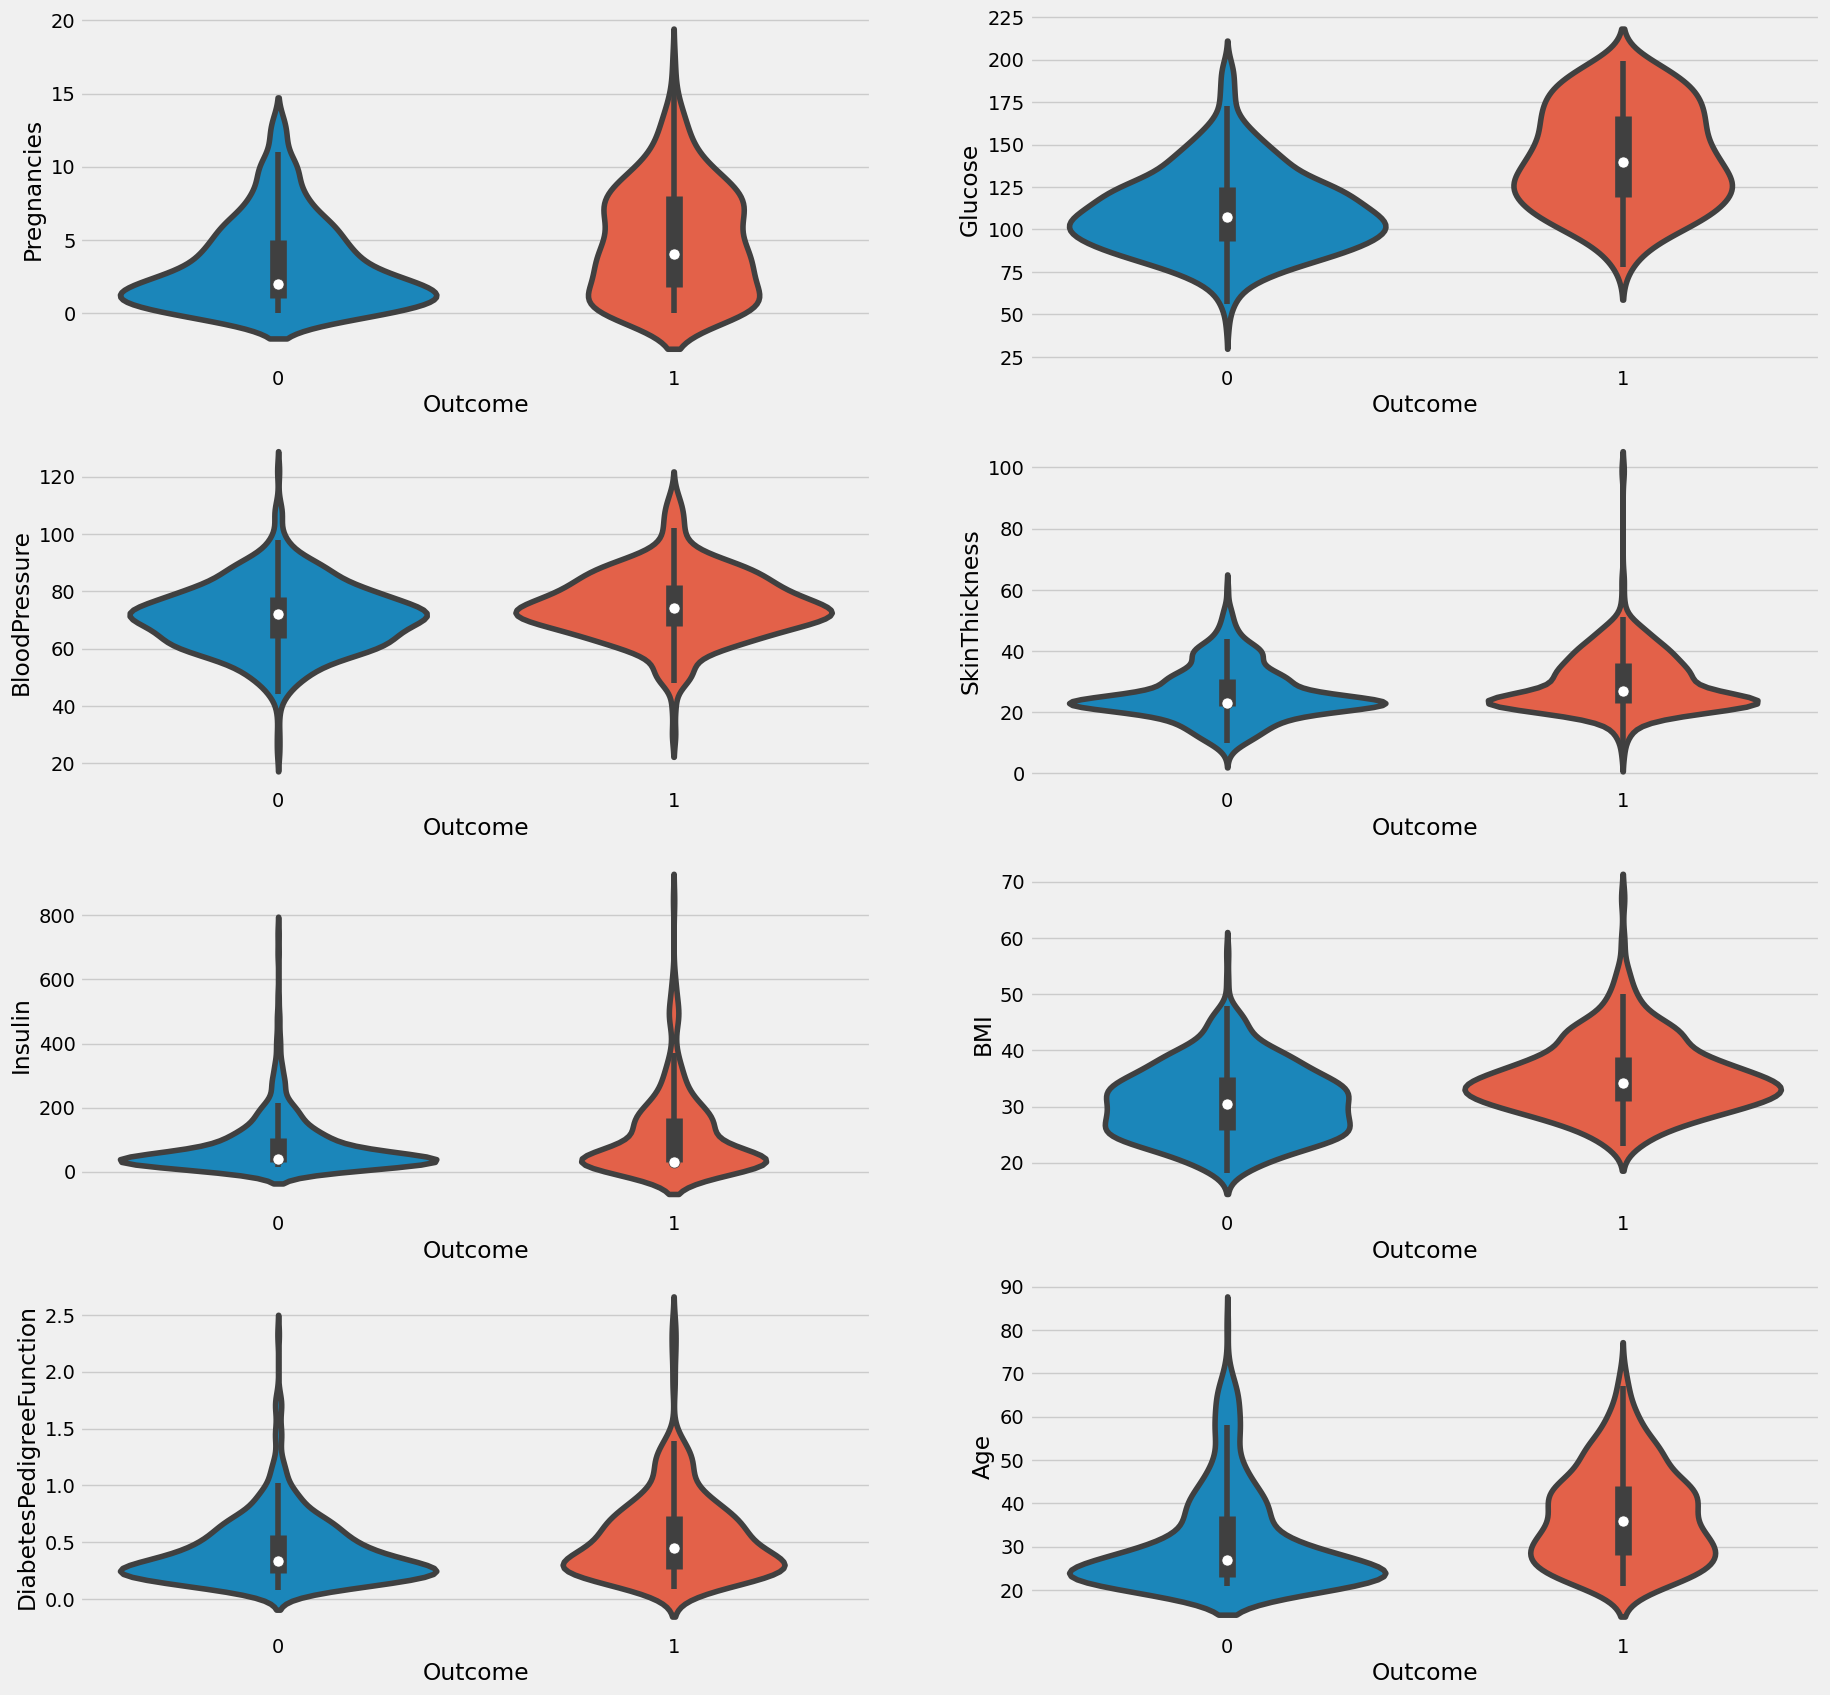

In [ ]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Pregnancies, ax=axes[0,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Glucose, ax=axes[0,1])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.BloodPressure, ax=axes[1,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.SkinThickness, ax=axes[1,1])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Insulin, ax=axes[2,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.BMI, ax=axes[2,1])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Age, ax=axes[3,1])

Una vez reemplazados los valores codificados como 0, los cambios en la grafica de violin son los siguientes

##Separacion de datos de entrenamiento y prueba

In [ ]:
X = diabetes_df.drop('Outcome', axis =1).values
y = diabetes_df.Outcome.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43, train_size=0.7)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=43)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

En esta linea se separa la salida del estado de diabetes y se establece el porcentaje de prueba como 30% y entrenamiento 70%, posteriormente se les aplica una funcion normalizadora a los datos de X_train, posteriormente se le aplica una division del 50% para motivos de desarrollo y prueba, la misma funcion normalizadora se usa en X_dev

In [ ]:
total_ratio = len(X_train) / (len(X_train) + len(X_test))
total_ratio

0.8223583460949464

##Redes Neuronales

###Modelo 1
3 capas escondidas, 8 neuronas, 0.3 dropout, paciencia 30, min_delta 0.0001, 2000 epocas

---



In [ ]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(8, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(8, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(8, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

Se definen 3 capas escondidas con 8 neuronas y una salida con activacion sigmoide


In [ ]:
model1 = nn()
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 8)                 72        
                                                                 
 BC1 (BatchNormalization)    (None, 8)                 32        
                                                                 
 Activation1 (Activation)    (None, 8)                 0         
                                                                 
 Dropout1 (Dropout)          (None, 8)                 0         
                                                                 
 FC2 (Dense)                 (None, 8)                 72        
                                                                 
 BC2 (BatchNormalization)    (None, 8)                 32    

Se revisan las especificaciones finales de la red neuronal

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])

Se compila el modelo con el modulo de perdida binaria, un aprendizaje de 0.1 con metricas de precision

In [ ]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=30, min_delta=0.0001)

Se ingresa la funcion RLRoP la cual es un callback que reduce la cantidad de aprendizaje si la metrica ha estado mejorando, esto ayuda al model a converger y escapar el minimo local
Earlystopping es un callback que para el entrenamiento cuando la metrica monitoreada ha parado de mejorar, esto ayuda a prevenir el sobreajuste y previniendo la degradacion del rendimiento

In [ ]:
model1.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X_dev, y_dev), callbacks=[reduce_lr, early_stopping], verbose=0)

Se establece el modelo con los datos de entrenamiento, 2000 epocas, con datos de validacion y con callbacks RLRoP y early stopping

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model1.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))

17/17 [==============================] - 0s 2ms/step
Training set:
	Accuracy:0.652
	Classification Report
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       348
           1       1.00      0.01      0.02       189

    accuracy                           0.65       537
   macro avg       0.83      0.51      0.40       537
weighted avg       0.77      0.65      0.52       537

4/4 [==============================] - 0s 3ms/step
Dev set:
	Accuracy:0.670
	Classification Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        77
           1       0.00      0.00      0.00        38

    accuracy                           0.67       115
   macro avg       0.33      0.50      0.40       115
weighted avg       0.45      0.67      0.54       115

4/4 [==============================] - 0s 3ms/step
Test set:
	Accuracy:0.647
	Classification Report
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Estas son las estadisticas modelo de 3 capas escondidas con 8 neuronas, 2000 epocas y escalada de aprendizaje 0.1

###Modelo 2
3 capas escondidas, 32-16-8 neuronas, 0.1 dropout, 4000 epocas paciencia 30, min_delta 0.0001


---

In [ ]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(32, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.1, name='Dropout1')(layer)
    layer = Dense(16, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.1, name='Dropout2')(layer)
    layer = Dense(8, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.1, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [ ]:
model2 = nn()
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 32)                288       
                                                                 
 BC1 (BatchNormalization)    (None, 32)                128       
                                                                 
 Activation1 (Activation)    (None, 32)                0         
                                                                 
 Dropout1 (Dropout)          (None, 32)                0         
                                                                 
 FC2 (Dense)                 (None, 16)                528       
                                                                 
 BC2 (BatchNormalization)    (None, 16)                64  

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=30, min_delta=0.0001)

In [ ]:
model2.fit(x=X_train, y=y_train, epochs=4000, validation_data=(X_dev, y_dev), callbacks=[reduce_lr, early_stopping], verbose=0)

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model2.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))

17/17 [==============================] - 0s 2ms/step
Training set:
	Accuracy:0.756
	Classification Report
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       348
           1       0.72      0.51      0.59       189

    accuracy                           0.76       537
   macro avg       0.74      0.70      0.71       537
weighted avg       0.75      0.76      0.74       537

4/4 [==============================] - 0s 3ms/step
Dev set:
	Accuracy:0.783
	Classification Report
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        77
           1       0.76      0.50      0.60        38

    accuracy                           0.78       115
   macro avg       0.77      0.71      0.73       115
weighted avg       0.78      0.78      0.77       115

4/4 [==============================] - 0s 3ms/step
Test set:
	Accuracy:0.707
	Classification Report
              precision    recall  f1-sco

###Modelo 3
3 capas escondidas, 32-16-4 neuronas, 0.1 dropout, 3500 epocas paciencia 25, min_delta 0.0001

---


In [ ]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(32, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.1, name='Dropout1')(layer)
    layer = Dense(16, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.1, name='Dropout2')(layer)
    layer = Dense(4, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.1, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [ ]:
model3 = nn()
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 32)                288       
                                                                 
 BC1 (BatchNormalization)    (None, 32)                128       
                                                                 
 Activation1 (Activation)    (None, 32)                0         
                                                                 
 Dropout1 (Dropout)          (None, 32)                0         
                                                                 
 FC2 (Dense)                 (None, 16)                528       
                                                                 
 BC2 (BatchNormalization)    (None, 16)                64  

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=25, min_delta=0.0001)

In [ ]:
model3.fit(x=X_train, y=y_train, epochs=3500, validation_data=(X_dev, y_dev), callbacks=[reduce_lr, early_stopping], verbose=0)

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model3.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))

17/17 [==============================] - 0s 2ms/step
Training set:
	Accuracy:0.749
	Classification Report
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       348
           1       0.68      0.55      0.61       189

    accuracy                           0.75       537
   macro avg       0.73      0.70      0.71       537
weighted avg       0.74      0.75      0.74       537

4/4 [==============================] - 0s 3ms/step
Dev set:
	Accuracy:0.800
	Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.73      0.63      0.68        38

    accuracy                           0.80       115
   macro avg       0.78      0.76      0.77       115
weighted avg       0.80      0.80      0.80       115

4/4 [==============================] - 0s 4ms/step
Test set:
	Accuracy:0.716
	Classification Report
              precision    recall  f1-sco

##Estadisticas de modelos

###Modelo 1
3 capas escondidas, 8 neuronas, 0.3 dropout, paciencia 30, min_delta 0.0001, 2000 epocas

---

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model1.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))

17/17 [==============================] - 0s 2ms/step
Training set:
	Accuracy:0.652
	Classification Report
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       348
           1       1.00      0.01      0.02       189

    accuracy                           0.65       537
   macro avg       0.83      0.51      0.40       537
weighted avg       0.77      0.65      0.52       537

4/4 [==============================] - 0s 3ms/step
Dev set:
	Accuracy:0.670
	Classification Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        77
           1       0.00      0.00      0.00        38

    accuracy                           0.67       115
   macro avg       0.33      0.50      0.40       115
weighted avg       0.45      0.67      0.54       115

4/4 [==============================] - 0s 3ms/step
Test set:
	Accuracy:0.647
	Classification Report
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

###Modelo 2
3 capas escondidas, 32-16-8 neuronas, 0.1 dropout, 4000 epocas paciencia 30, min_delta 0.0001


---

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model2.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))

17/17 [==============================] - 0s 2ms/step
Training set:
	Accuracy:0.756
	Classification Report
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       348
           1       0.72      0.51      0.59       189

    accuracy                           0.76       537
   macro avg       0.74      0.70      0.71       537
weighted avg       0.75      0.76      0.74       537

4/4 [==============================] - 0s 3ms/step
Dev set:
	Accuracy:0.783
	Classification Report
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        77
           1       0.76      0.50      0.60        38

    accuracy                           0.78       115
   macro avg       0.77      0.71      0.73       115
weighted avg       0.78      0.78      0.77       115

4/4 [==============================] - 0s 3ms/step
Test set:
	Accuracy:0.707
	Classification Report
              precision    recall  f1-sco

###Modelo 3
3 capas escondidas, 32-16-4 neuronas, 0.1 dropout, 3500 epocas paciencia 25, min_delta 0.0001

---

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model3.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))

17/17 [==============================] - 0s 2ms/step
Training set:
	Accuracy:0.749
	Classification Report
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       348
           1       0.68      0.55      0.61       189

    accuracy                           0.75       537
   macro avg       0.73      0.70      0.71       537
weighted avg       0.74      0.75      0.74       537

4/4 [==============================] - 0s 3ms/step
Dev set:
	Accuracy:0.800
	Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.73      0.63      0.68        38

    accuracy                           0.80       115
   macro avg       0.78      0.76      0.77       115
weighted avg       0.80      0.80      0.80       115

4/4 [==============================] - 0s 3ms/step
Test set:
	Accuracy:0.716
	Classification Report
              precision    recall  f1-sco

##Conclusion

La implementacion de este proyecto muestra 3 modelos con rasgos variantes, uno de control y 2 modelos que evolucionan tanto en profundidad y extension de sus capas de neuronas y la cantidad de sus epocas.

En el modelo 2 y modelo 3 se cuenta principalmente el valor f1 para contabilizar mejor rendimiento.

El modelo 2 tiene mayor cantidad de puntaje f1 en el dev set

El modelo 3 tiene mayor consistencia en sus 3 puntajes f1 de sus sets de datos

#Aprendizaje Regresion linear, Softmax y Set de datos complejo

##Importe de datos

In [ ]:
diabetescomp_df = pd.read_csv('/content/drive/MyDrive/diabetes_012_health_indicators_BRFSS2015.csv.zip', delimiter=',')
diabetescompbinary_df = diabetescomp_df
diabetescomp_df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:
diabetescompbinary_df.head(10)

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   
5                   0.0           1.0     1.0  ...            1.0   
6                   0.0           0.0     0.0  ...            1.0   
7                   0.0           1.0     0.0  ...            1.0   
8                   1.0           0.0     1.0  ...            1.0   
9                   0.0           0.0     0.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   
5          0.0      2.0       0.0       2.0       0.0  1.0  10.0        6.0   
6          0.0      3.0       0.0      14.0       0.0  0.0   9.0        6.0   
7          0.0      3.0       0.0       0.0       1.0  0.0  11.0        4.0   
8          0.0      5.0      30.0      30.0       1.0  0.0   9.0        5.0   
9          0.0      2.0       0.0       0.0       0.0  1.0   8.0        4.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  
5     8.0  
6     7.0  
7     4.0  
8     1.0  
9     3.0  

[10 rows x 22 columns]

In [ ]:
diabetescompbinary_df.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

Se descarga el set de datos y se importa como una variable para poder trabajar con este.

In [ ]:

diabetescompbinary_df = pd.DataFrame(diabetescompbinary_df)


# Specify the value you want to check
value_to_delete = 1.0

# Identify rows where the 'Diabetes_012' column has the specified value
rows_to_delete = diabetescompbinary_df[diabetescompbinary_df['Diabetes_012'] == value_to_delete].index

# Drop identified rows
diabetescompbinary_df = diabetescompbinary_df.drop(index=rows_to_delete)

diabetescompbinary_df.head(10)



Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   
5                   0.0           1.0     1.0  ...            1.0   
6                   0.0           0.0     0.0  ...            1.0   
7                   0.0           1.0     0.0  ...            1.0   
8                   1.0           0.0     1.0  ...            1.0   
9                   0.0           0.0     0.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   
5          0.0      2.0       0.0       2.0       0.0  1.0  10.0        6.0   
6          0.0      3.0       0.0      14.0       0.0  0.0   9.0        6.0   
7          0.0      3.0       0.0       0.0       1.0  0.0  11.0        4.0   
8          0.0      5.0      30.0      30.0       1.0  0.0   9.0        5.0   
9          0.0      2.0       0.0       0.0       0.0  1.0   8.0        4.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  
5     8.0  
6     7.0  
7     4.0  
8     1.0  
9     3.0  

[10 rows x 22 columns]

In [ ]:
diabetescompbinary_df = pd.DataFrame(diabetescompbinary_df)

# Specify the column and the value you want to replace
column_to_update = 'Diabetes_012'
value_to_replace = 2.0
new_value = 1.0

# Replace the values in the specified column
diabetescompbinary_df[column_to_update] = diabetescompbinary_df[column_to_update].replace(value_to_replace, new_value)

diabetescompbinary_df.head(10)


Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   
5                   0.0           1.0     1.0  ...            1.0   
6                   0.0           0.0     0.0  ...            1.0   
7                   0.0           1.0     0.0  ...            1.0   
8                   1.0           0.0     1.0  ...            1.0   
9                   0.0           0.0     0.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   
5          0.0      2.0       0.0       2.0       0.0  1.0  10.0        6.0   
6          0.0      3.0       0.0      14.0       0.0  0.0   9.0        6.0   
7          0.0      3.0       0.0       0.0       1.0  0.0  11.0        4.0   
8          0.0      5.0      30.0      30.0       1.0  0.0   9.0        5.0   
9          0.0      2.0       0.0       0.0       0.0  1.0   8.0        4.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  
5     8.0  
6     7.0  
7     4.0  
8     1.0  
9     3.0  

[10 rows x 22 columns]

In [ ]:
target = diabetescompbinary_df['Diabetes_012'].value_counts()
print(target)

0.0    213703
1.0     35346
Name: Diabetes_012, dtype: int64


##Analisis de datos

###Bloque 1

In [ ]:
diabetescomp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Se revisa el tipo de informacion asi como tambien las listas totales de entradas que existen en el set de datos.
Tambien para revisar si el set de datos le falta alguna informacion

In [ ]:
diabetescomp_df.corr()

Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.271596  0.209085   0.067546  0.224379   
HighBP                    0.271596  1.000000  0.298199   0.098508  0.213748   
HighChol                  0.209085  0.298199  1.000000   0.085642  0.106722   
CholCheck                 0.067546  0.098508  0.085642   1.000000  0.034495   
BMI                       0.224379  0.213748  0.106722   0.034495  1.000000   
Smoker                    0.062914  0.096991  0.091299  -0.009929  0.013804   
Stroke                    0.107179  0.129575  0.092620   0.024158  0.020153   
HeartDiseaseorAttack      0.180272  0.209361  0.180765   0.044206  0.052904   
PhysActivity             -0.121947 -0.125267 -0.078046   0.004190 -0.147294   
Fruits                   -0.042192 -0.040555 -0.040859   0.023849 -0.087518   
Veggies                  -0.058972 -0.061266 -0.039874   0.006121 -0.062275   
HvyAlcoholConsump        -0.057882 -0.003972 -0.011543  -0.023730 -0.048736   
AnyHealthcare             0.015410  0.038425  0.042230   0.117626 -0.018471   
NoDocbcCost               0.035436  0.017358  0.013310  -0.058255  0.058206   
GenHlth                   0.302587  0.300530  0.208426   0.046589  0.239185   
MentHlth                  0.073507  0.056456  0.062069  -0.008366  0.085310   
PhysHlth                  0.176287  0.161212  0.121751   0.031775  0.121141   
DiffWalk                  0.224239  0.223618  0.144672   0.040585  0.197078   
Sex                       0.031040  0.052207  0.031205  -0.022115  0.042950   
Age                       0.185026  0.344452  0.272318   0.090321 -0.036618   
Education                -0.130517 -0.141358 -0.070802   0.001510 -0.103932   
Income                   -0.171483 -0.171235 -0.085459   0.014259 -0.100069   

                        Smoker    Stroke  HeartDiseaseorAttack  PhysActivity  \
Diabetes_012          0.062914  0.107179              0.180272     -0.121947   
HighBP                0.096991  0.129575              0.209361     -0.125267   
HighChol              0.091299  0.092620              0.180765     -0.078046   
CholCheck            -0.009929  0.024158              0.044206      0.004190   
BMI                   0.013804  0.020153              0.052904     -0.147294   
Smoker                1.000000  0.061173              0.114441     -0.087401   
Stroke                0.061173  1.000000              0.203002     -0.069151   
HeartDiseaseorAttack  0.114441  0.203002              1.000000     -0.087299   
PhysActivity         -0.087401 -0.069151             -0.087299      1.000000   
Fruits               -0.077666 -0.013389             -0.019790      0.142756   
Veggies              -0.030678 -0.041124             -0.039167      0.153150   
HvyAlcoholConsump     0.101619 -0.016950             -0.028991      0.012392   
AnyHealthcare        -0.023251  0.008776              0.018734      0.035505   
NoDocbcCost           0.048946  0.034804              0.031000     -0.061638   
GenHlth               0.163143  0.177942              0.258383     -0.266186   
MentHlth              0.092196  0.070172              0.064621     -0.125587   
PhysHlth              0.116460  0.148944              0.181698     -0.219230   
DiffWalk              0.122463  0.176567              0.212709     -0.253174   
Sex                   0.093662  0.002978              0.086096      0.032482   
Age                   0.120641  0.126974              0.221618     -0.092511   
Education            -0.161955 -0.076009             -0.099600      0.199658   
Income               -0.123937 -0.128599             -0.141011      0.198539   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
Diabetes_012         -0.042192  ...       0.015410     0.035436  0.302587   
HighBP               -0.040555  ...       0.038425     0.017358  0.300530   
HighChol             -0.040859  ...       0.042230     0.013310  0.208426   
CholCheck             0.023849  ...       0.117626    -

Se utiliza para calcular la correlación entre columnas en un DataFrame. La correlación es una medida estadística que describe la relación entre dos variables. El valor de la correlación puede oscilar entre -1 y 1, donde:

1 indica una correlación positiva perfecta, lo que significa que a medida que una variable aumenta, la otra también lo hace de manera proporcional.

-1 indica una correlación negativa perfecta, lo que significa que a medida que una variable aumenta, la otra disminuye de manera proporcional.
0 indica una falta de correlación, es decir, que no hay una relación lineal entre las dos variables.

<Axes: >

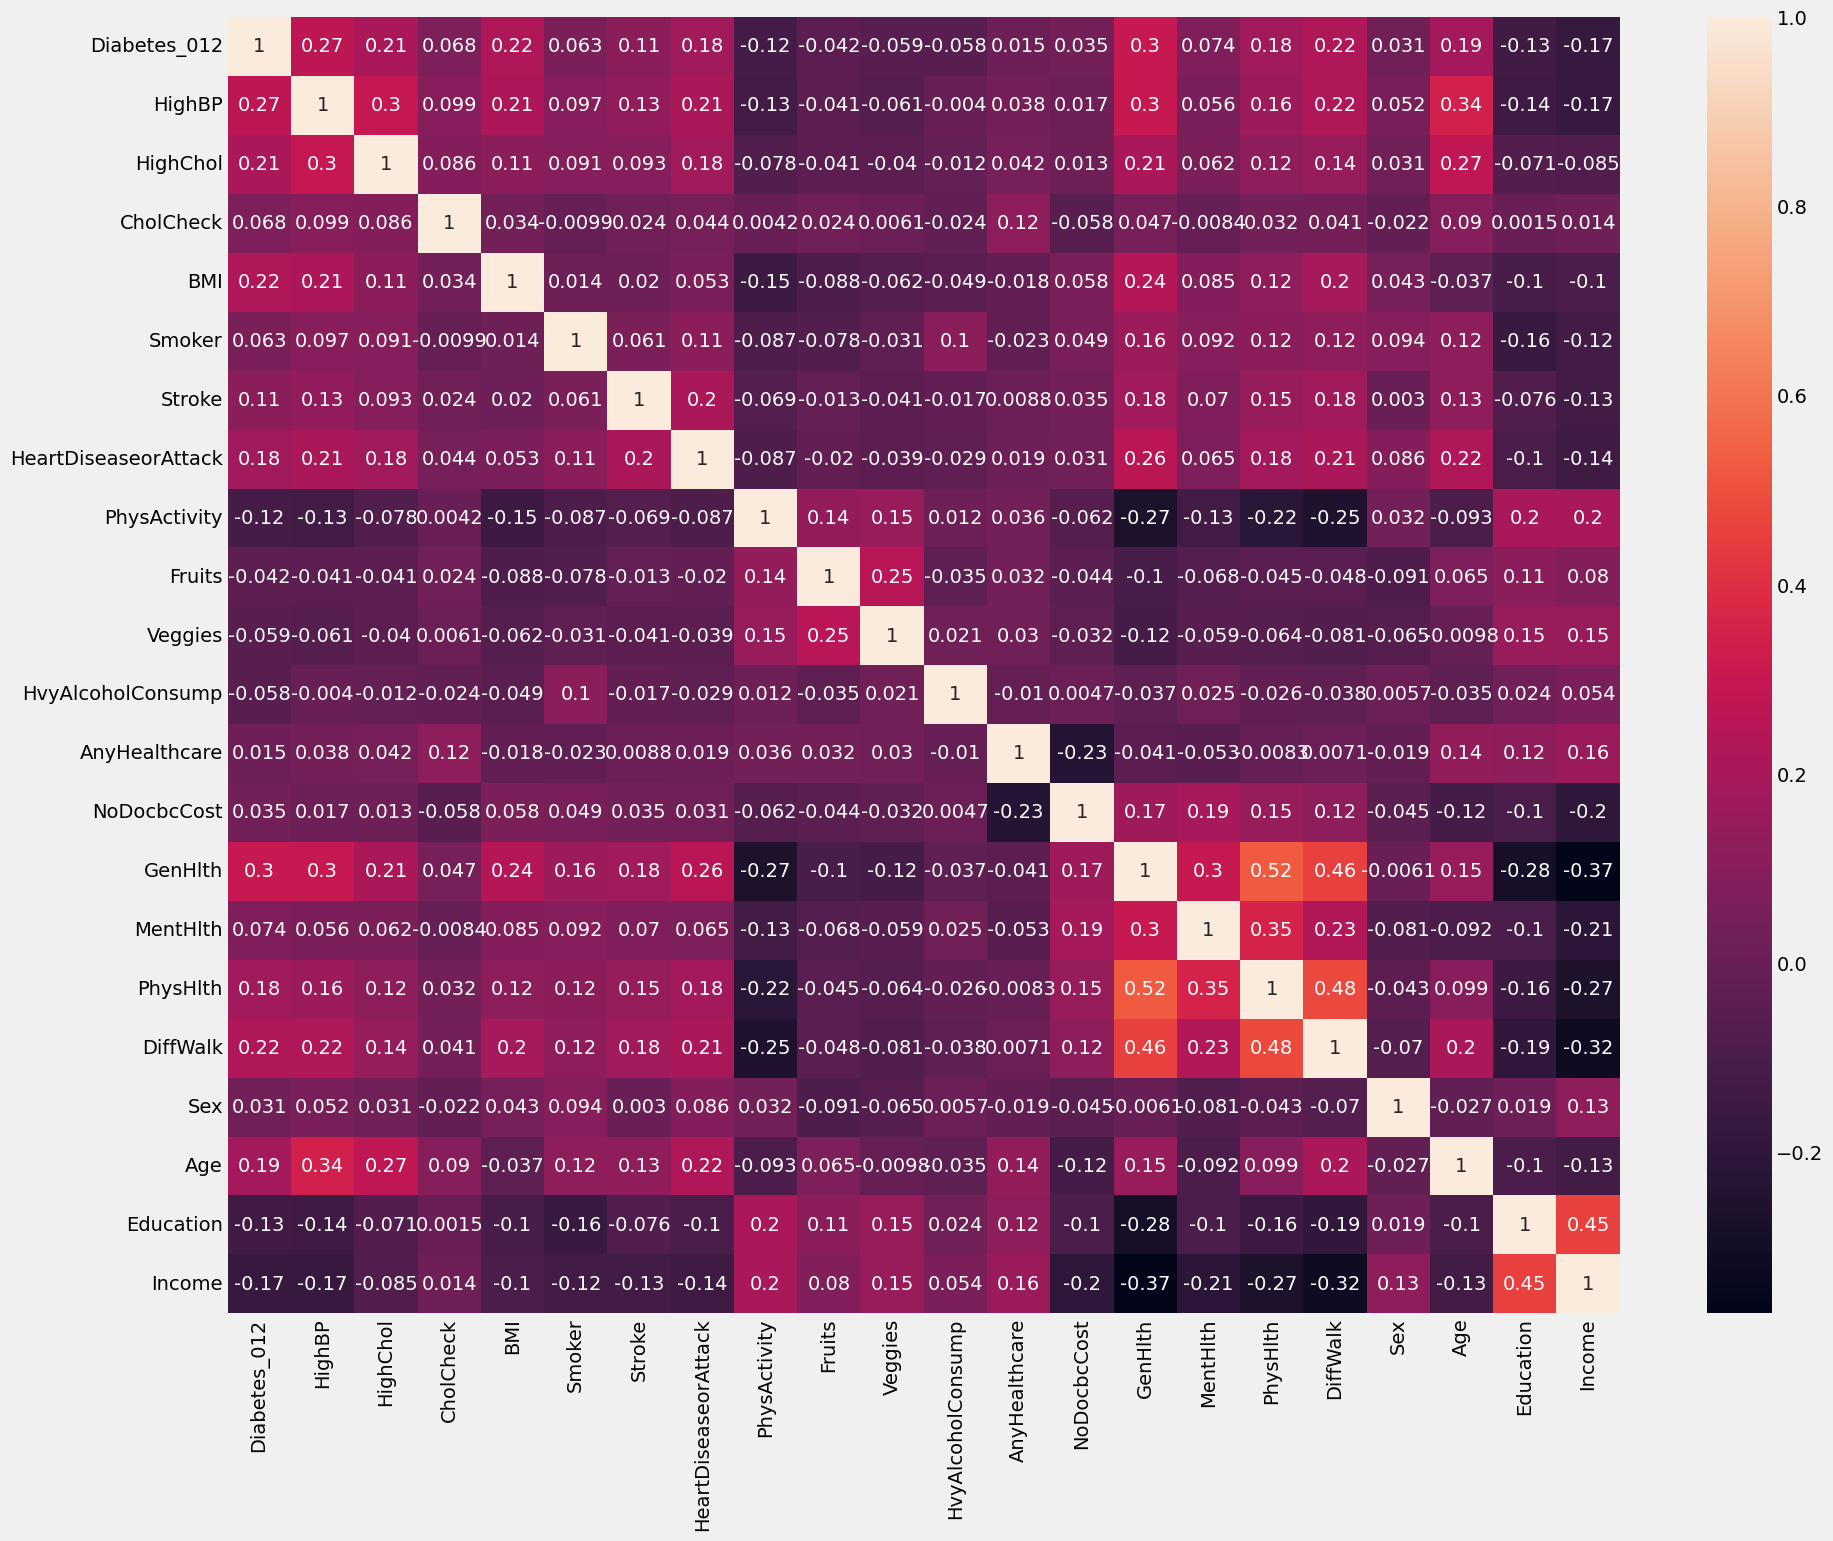

In [ ]:
f, ax = plt.subplots(1, figsize=(20,16))
sns.heatmap(diabetescomp_df.corr(), annot=True, ax=ax)

Usando seaborn, podemos realizar un mapa de calor usando las variables y la funcion de correlacion para inferir cuales son las variables que tienen mayor influencia dentro de otra variable

Dentro del mapa de calor se puede ver que existe una correlacion entre la glucosa fuerte entre la clasificacion de diabetes, asi como tambien el indice de masa corporal, edad y embarazos

In [ ]:
remover=['Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income',]
diabetescomp_df = diabetescomp_df.drop(columns=remover)
diabetescomp_df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  MentHlth  
0                   0.0           0.0     0.0      18.0  
1                   0.0           1.0     0.0       0.0  
2                   0.0           0.0     1.0      30.0  
3                   0.0           1.0     1.0       0.0  
4                   0.0           1.0     1.0       3.0

<Axes: xlabel='Diabetes_012', ylabel='count'>

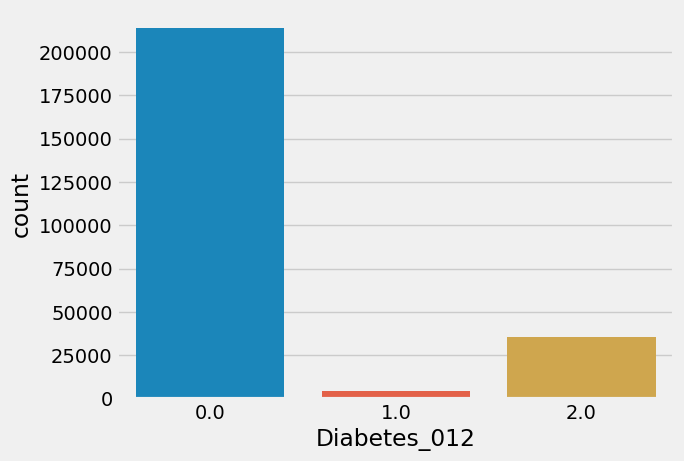

In [ ]:
sns.countplot(x=diabetescomp_df.Diabetes_012)


Se realiza un conteo de las variables de salida(diabetes , prediabetes o no diabetes), tambien podemos notar que existen un imbalance dentro de los valores, por lo cual el aprendizaje sera increiblemente fuerte en cuato a prediccion de un valor, al lo cual se utilizara una estrategia de undersampling a una proporcion de 1:1

In [ ]:
diabetescomp_df1 = diabetescomp_df[np.isclose(diabetescomp_df['Diabetes_012'], 0)]
diabetescomp_df2 = diabetescomp_df[np.isclose(diabetescomp_df['Diabetes_012'], 1)]
diabetescomp_df3 = diabetescomp_df[np.isclose(diabetescomp_df['Diabetes_012'], 2)]


df_0_resampled = resample(diabetescomp_df1, replace=False, n_samples=len(diabetescomp_df2), random_state=42)
df_2_resampled = resample(diabetescomp_df3, replace=False, n_samples=len(diabetescomp_df2), random_state=42)


df_resampled = pd.concat([df_0_resampled, diabetescomp_df2, df_2_resampled])



df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)


print(df_resampled['Diabetes_012'].value_counts())

2.0    4631
0.0    4631
1.0    4631
Name: Diabetes_012, dtype: int64


Realizamos una funcion que nos permite asignar el valor al cual queremos balancear, en este caso el valor 1.0 para y eliminamos muestras de forma aleatoria hasta quedar con el mismo numero de muestras en los 3 valores

In [ ]:
diabetescomp_df = df_resampled

<Axes: xlabel='Diabetes_012', ylabel='count'>

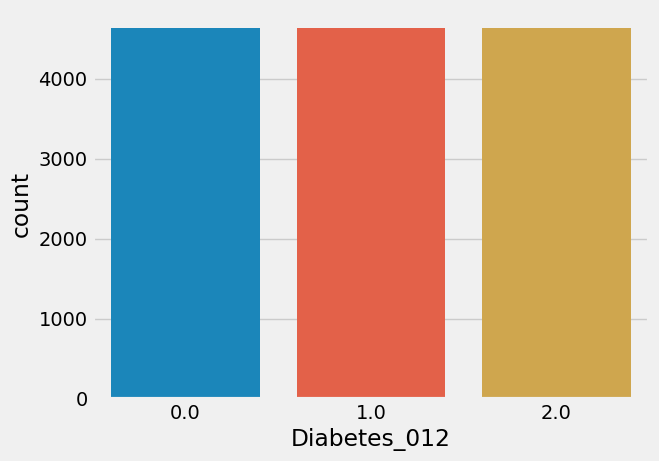

In [ ]:
sns.countplot(x=diabetescomp_df.Diabetes_012)


<Axes: >

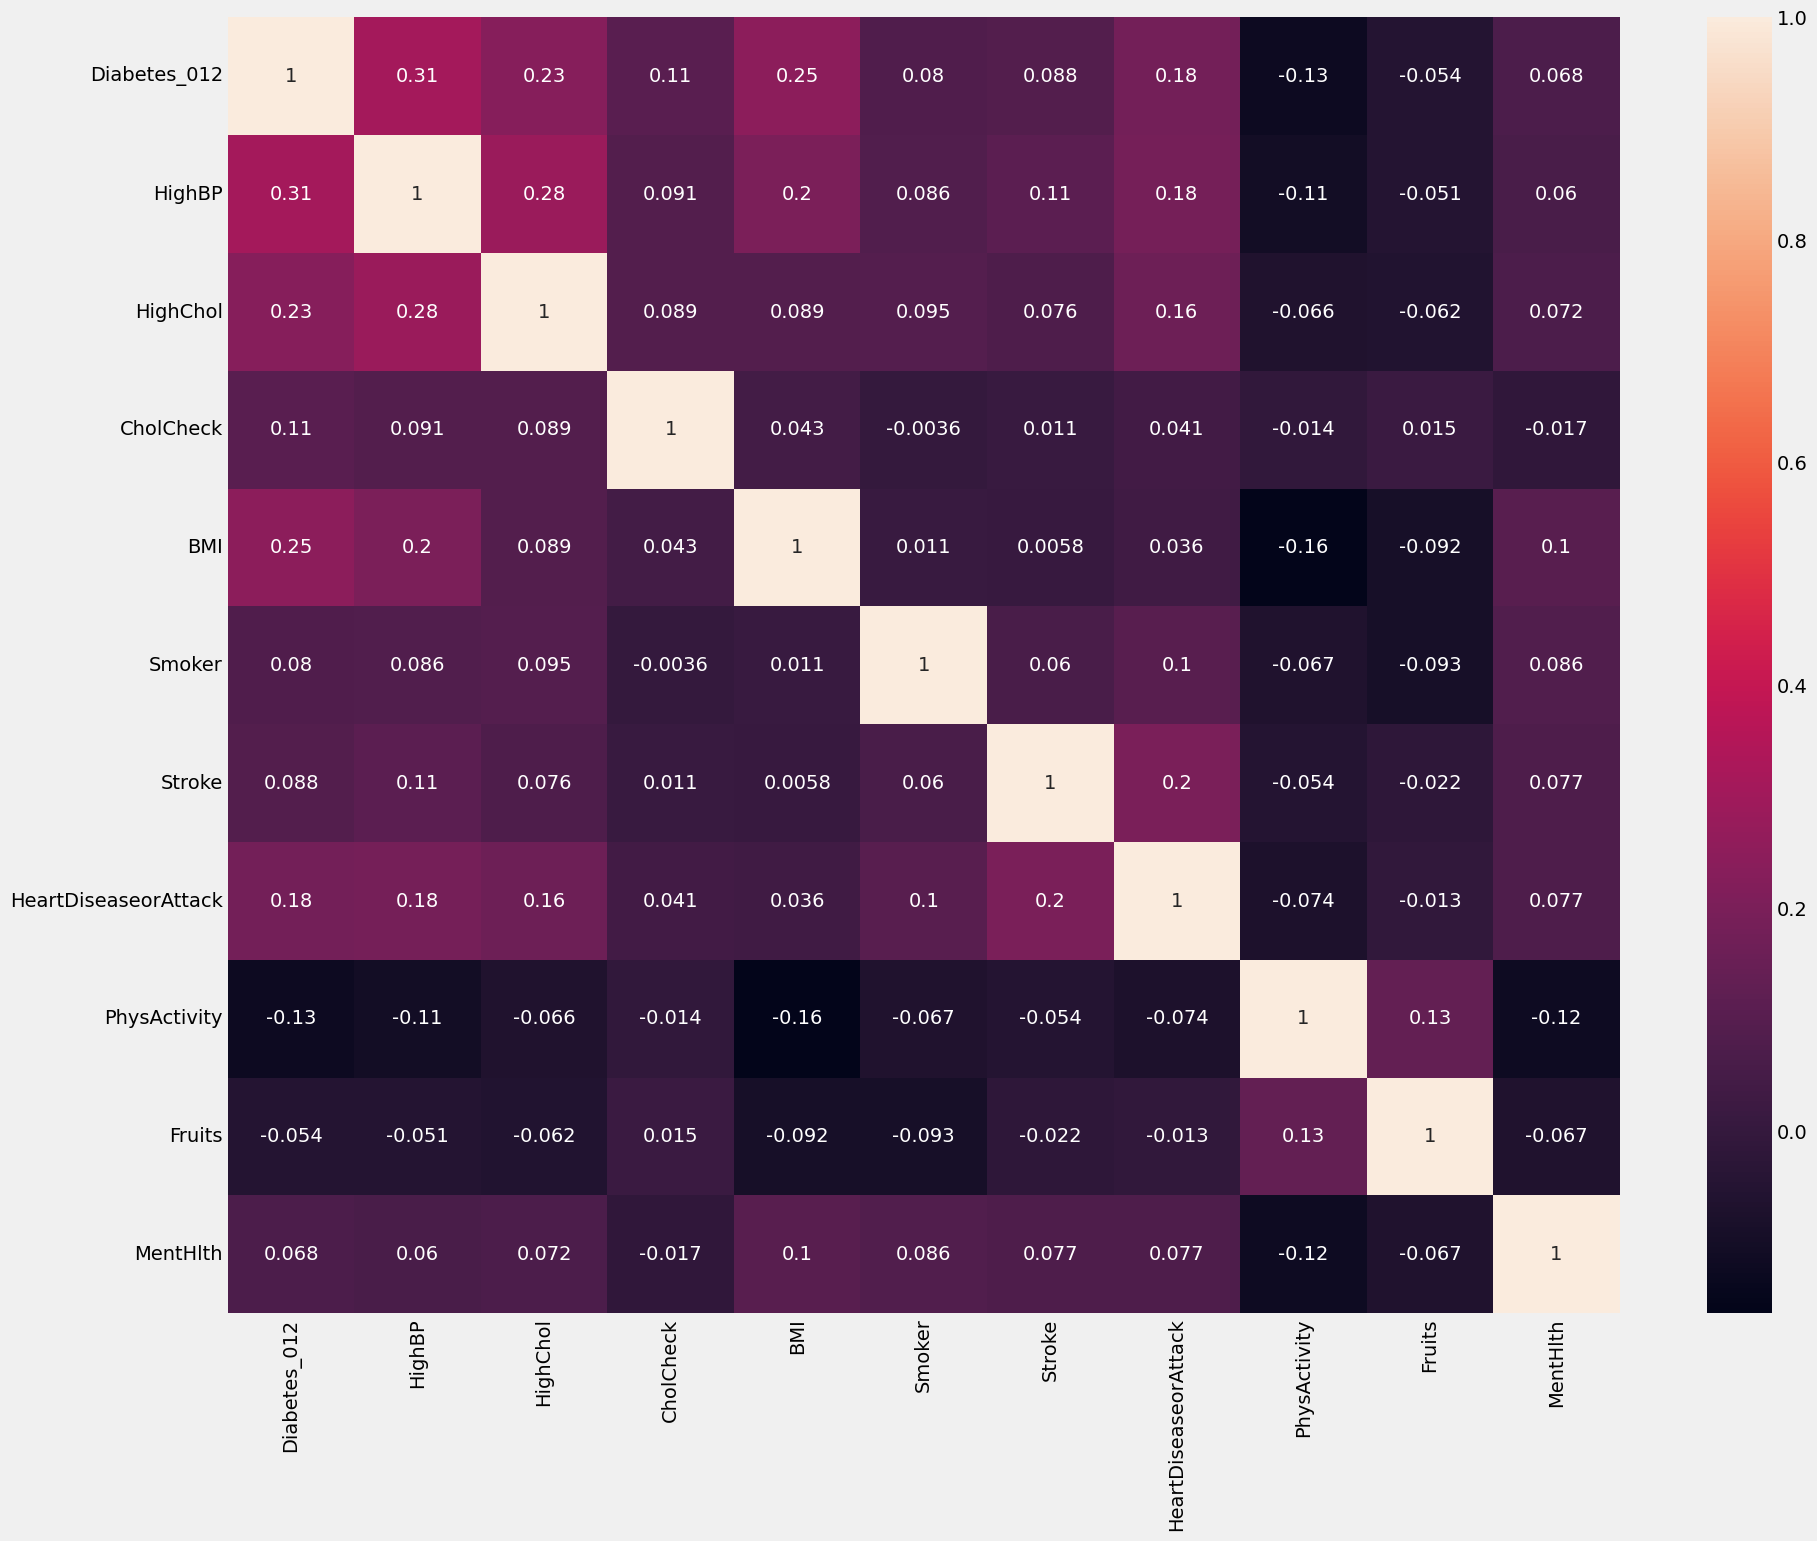

In [ ]:
f, ax = plt.subplots(1, figsize=(20,16))
sns.heatmap(diabetescomp_df.corr(), annot=True, ax=ax)

<Axes: xlabel='Diabetes_012', ylabel='Smoker'>

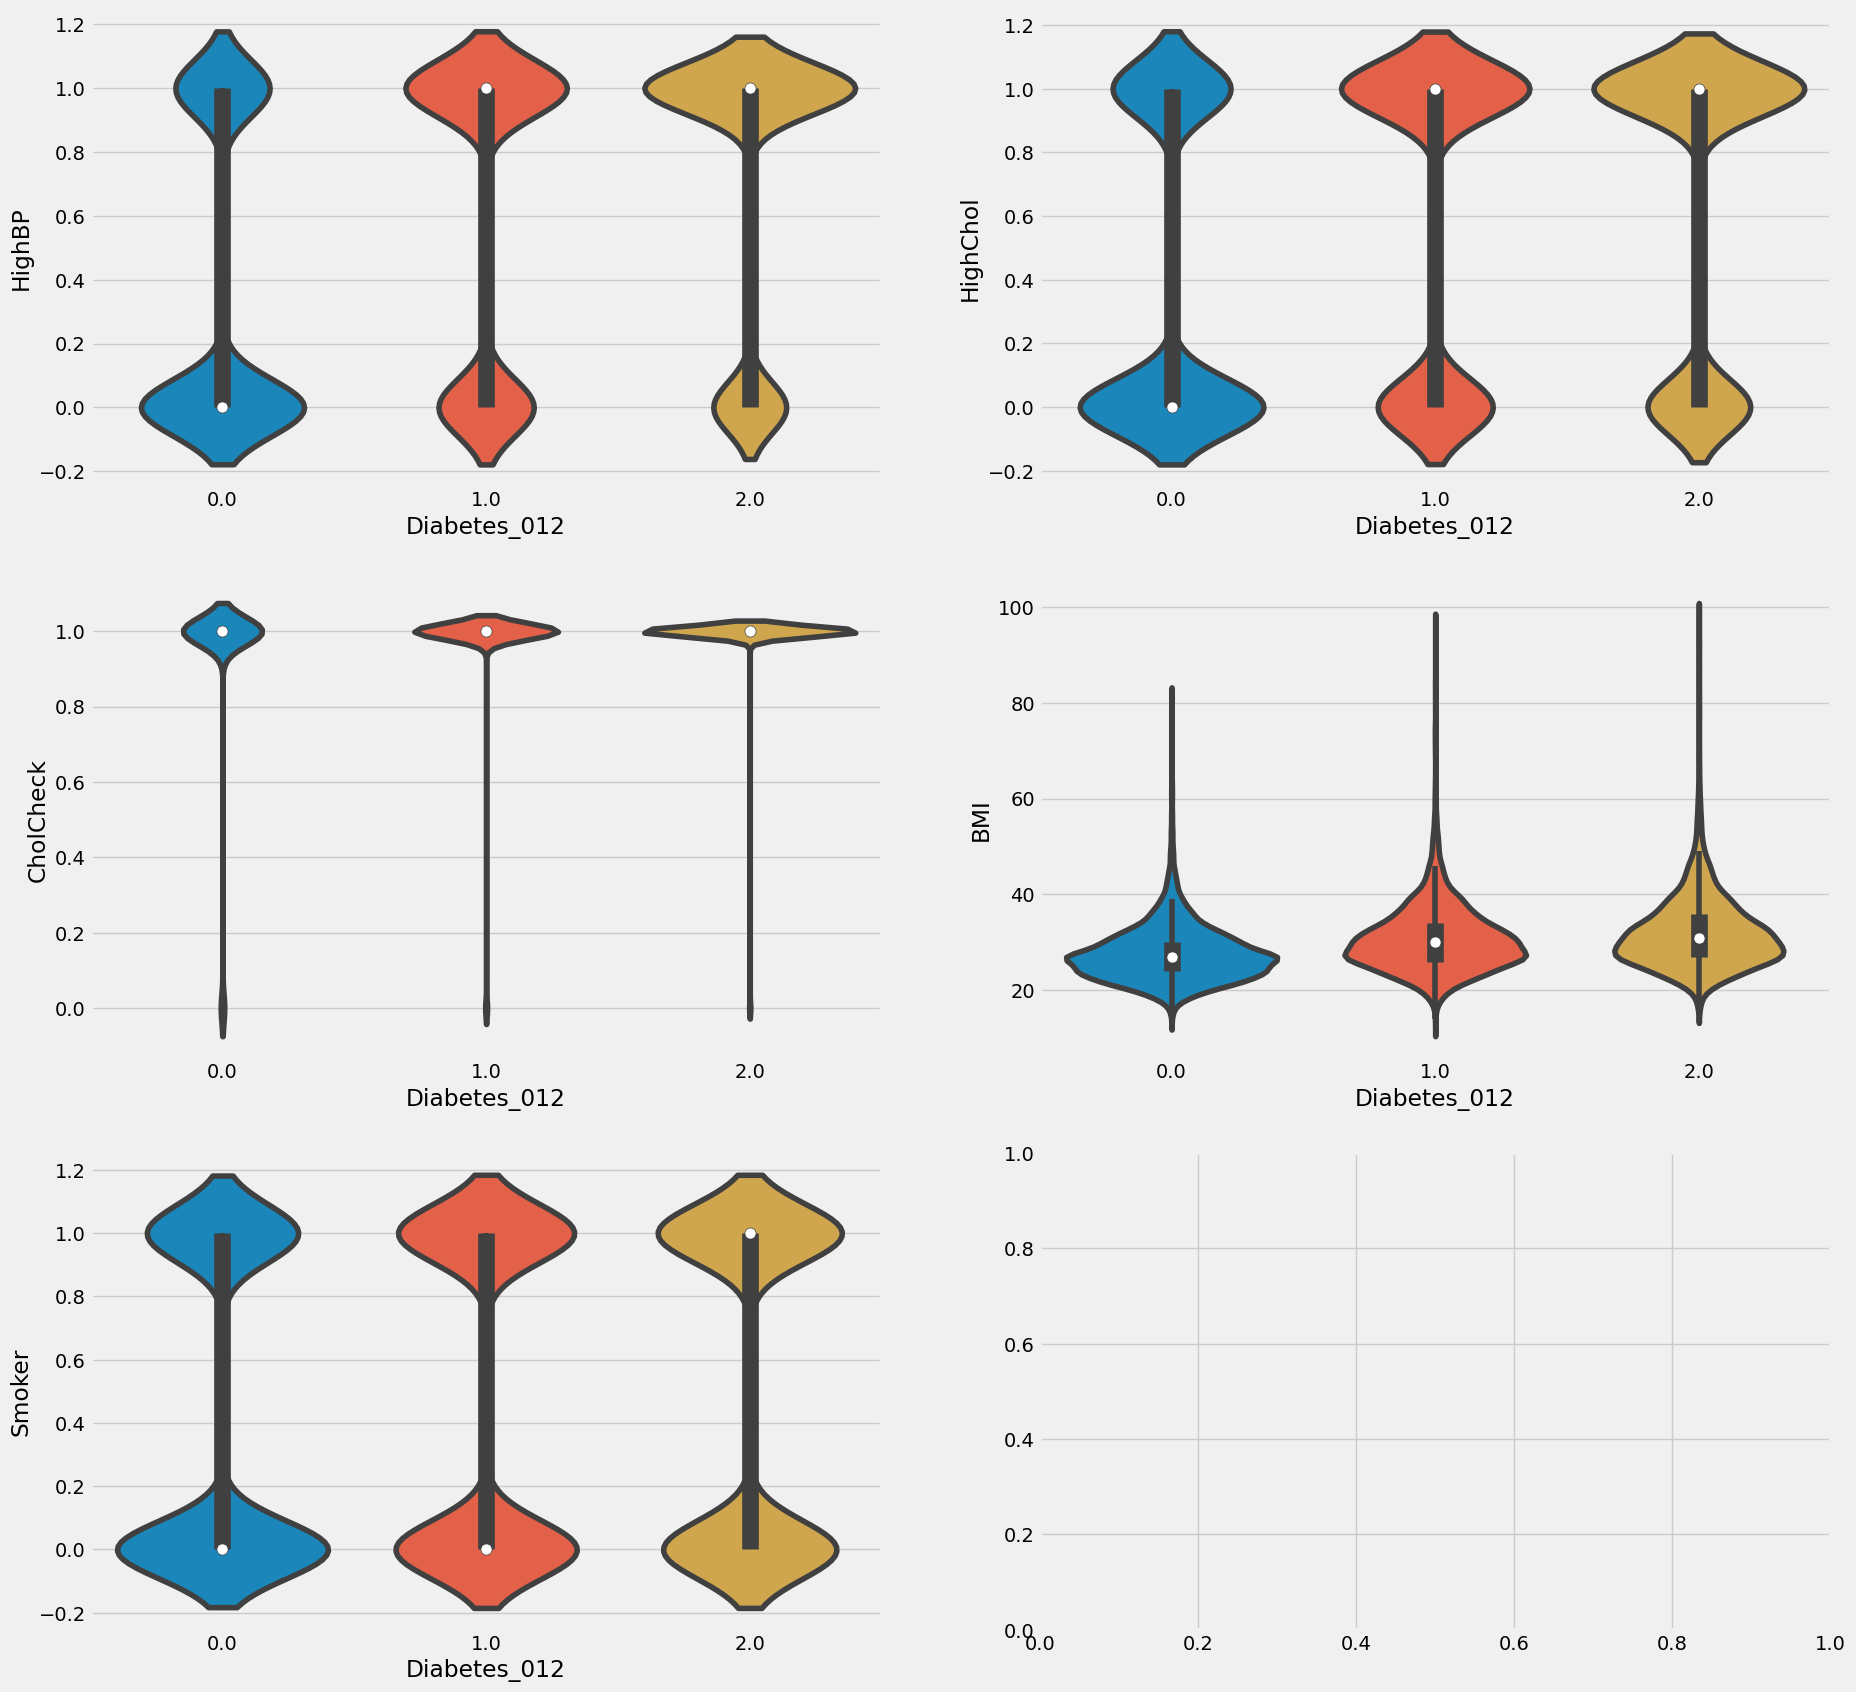

In [ ]:
f, axes = plt.subplots(3,2, figsize=(20,20))
sns.violinplot(x=diabetescomp_df.Diabetes_012 ,y=diabetescomp_df.HighBP, ax=axes[0,0])
sns.violinplot(x=diabetescomp_df.Diabetes_012 ,y=diabetescomp_df.HighChol, ax=axes[0,1])
sns.violinplot(x=diabetescomp_df.Diabetes_012 ,y=diabetescomp_df.CholCheck, ax=axes[1,0])
sns.violinplot(x=diabetescomp_df.Diabetes_012 ,y=diabetescomp_df.BMI, ax=axes[1,1])
sns.violinplot(x=diabetescomp_df.Diabetes_012 ,y=diabetescomp_df.Smoker, ax=axes[2,0])


<Axes: xlabel='Diabetes_012', ylabel='MentHlth'>

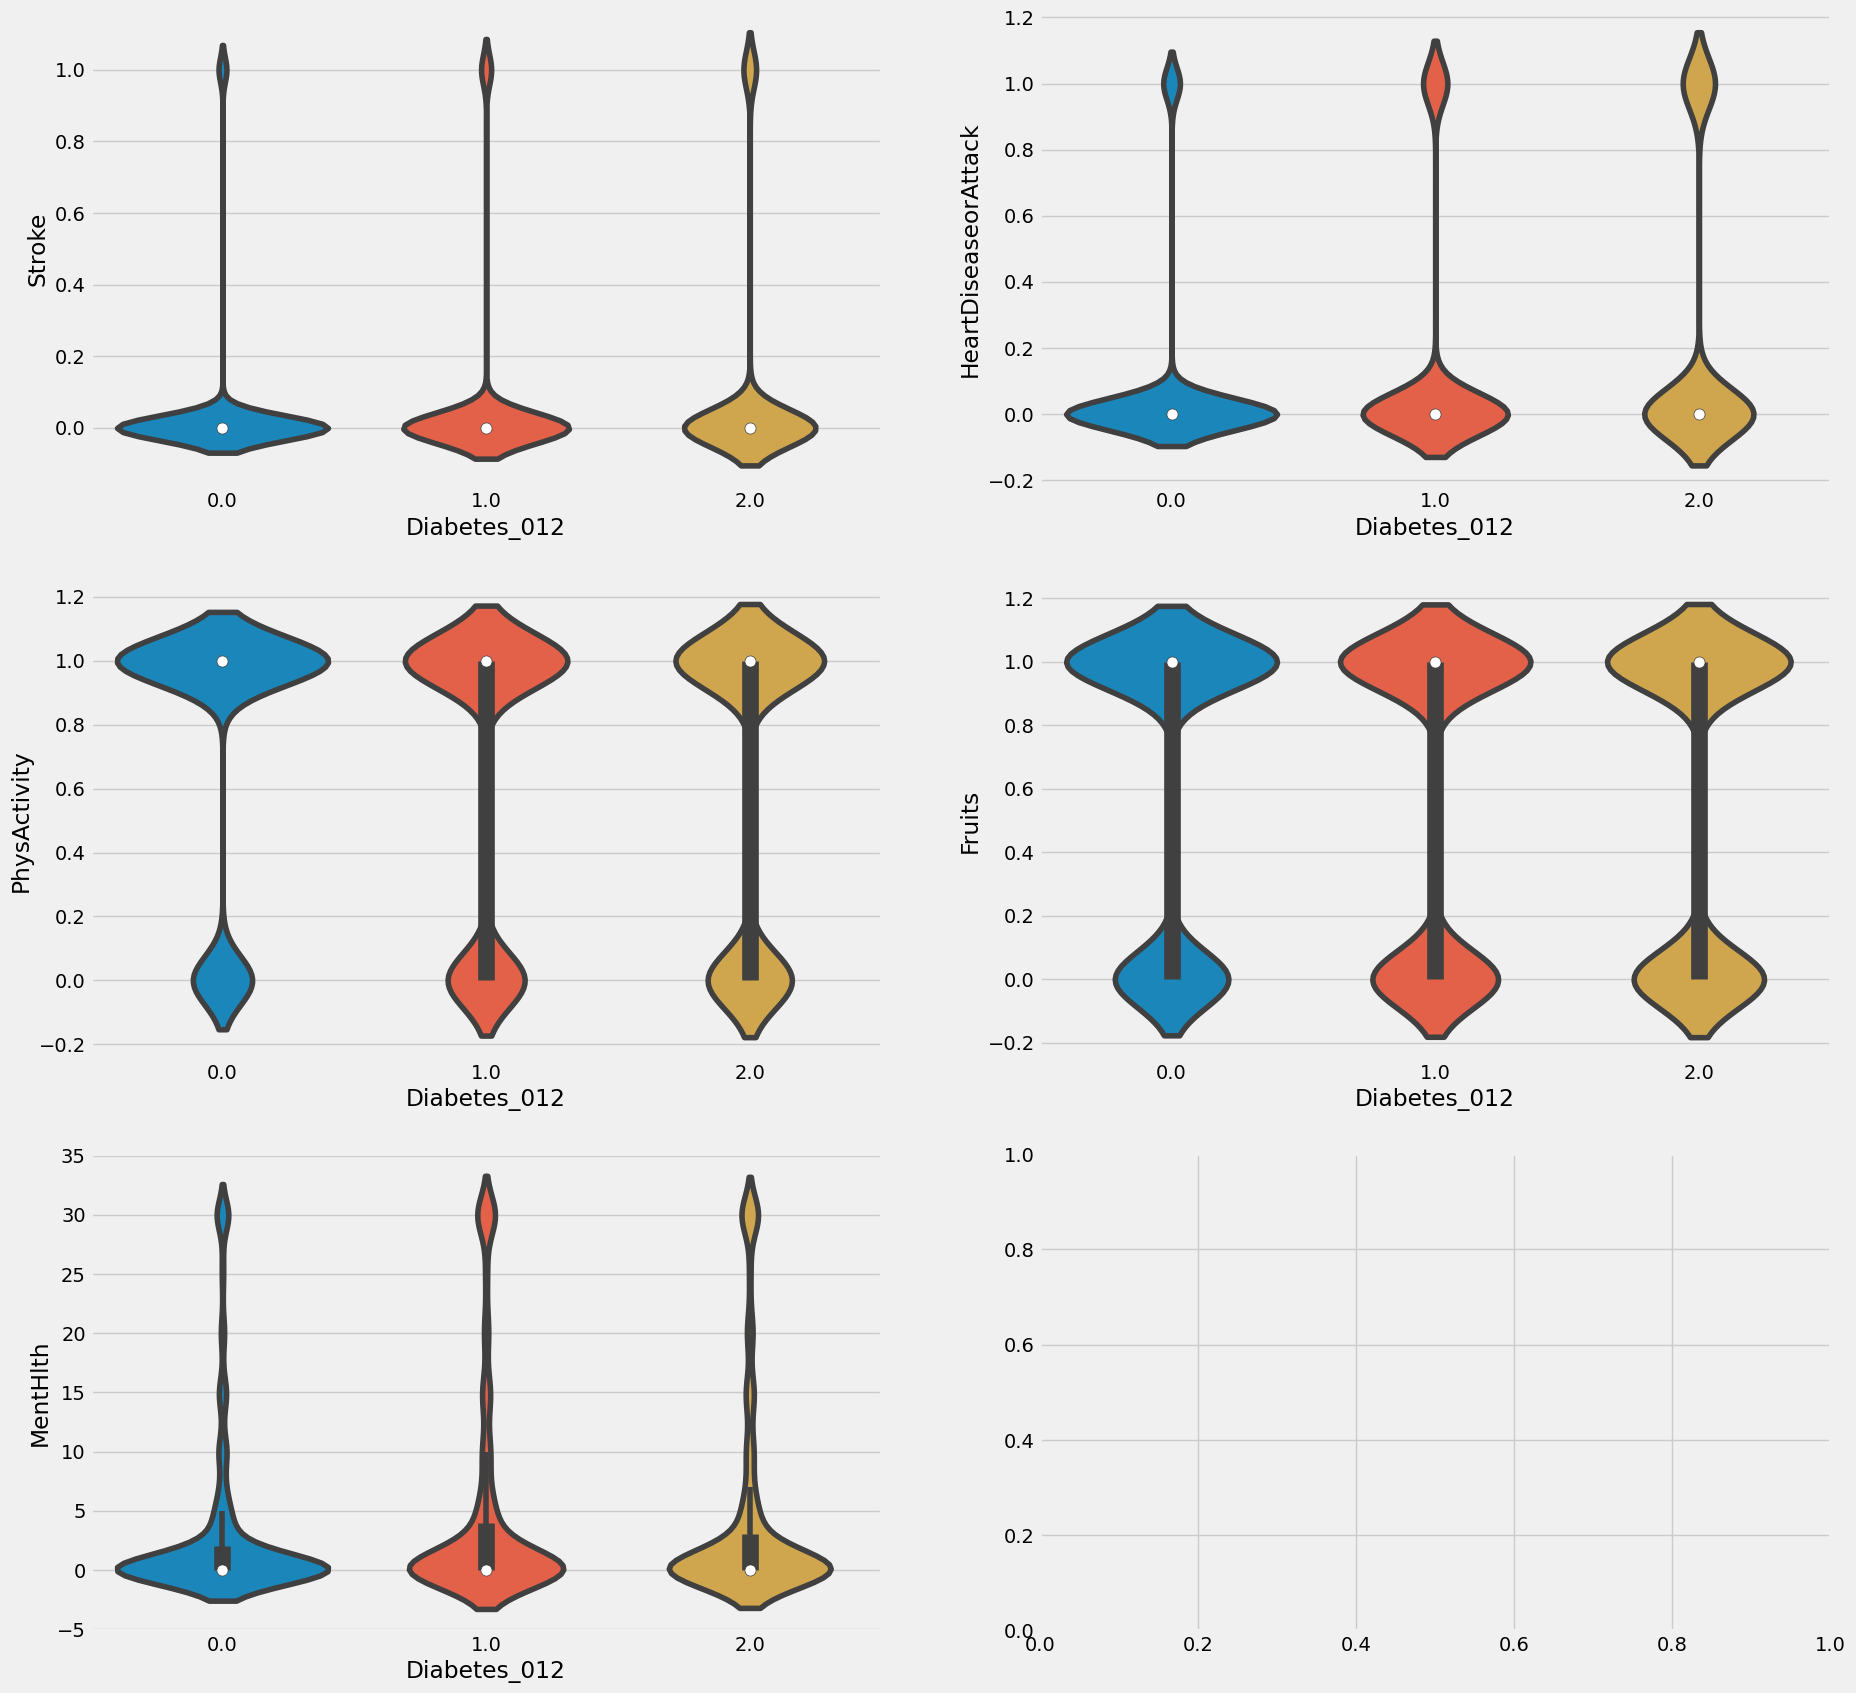

In [ ]:
f, axes = plt.subplots(3,2, figsize=(20,20))
sns.violinplot(x=diabetescomp_df.Diabetes_012 ,y=diabetescomp_df.Stroke, ax=axes[0,0])
sns.violinplot(x=diabetescomp_df.Diabetes_012 ,y=diabetescomp_df.HeartDiseaseorAttack, ax=axes[0,1])
sns.violinplot(x=diabetescomp_df.Diabetes_012 ,y=diabetescomp_df.PhysActivity, ax=axes[1,0])
sns.violinplot(x=diabetescomp_df.Diabetes_012 ,y=diabetescomp_df.Fruits, ax=axes[1,1])
sns.violinplot(x=diabetescomp_df.Diabetes_012 ,y=diabetescomp_df.MentHlth, ax=axes[2,0])

Con ayuda de seaborn realizamos un diagrama de violin en relacion a la probabilidad existente de la variable diabetes.
 Un diagrama de violín es un gráfico estadístico para comparar distribuciones de probabilidad

In [ ]:
column_names = diabetescomp_df.columns
column_names = column_names.drop('Diabetes_012')
for name in column_names:
    print('{}\n'.format(name))
    print(diabetescomp_df.groupby(['Diabetes_012'])[name].mean())
    print()

HighBP

Diabetes_012
0.0    0.366228
1.0    0.629022
2.0    0.743036
Name: HighBP, dtype: float64

HighChol

Diabetes_012
0.0    0.391060
1.0    0.620816
2.0    0.672425
Name: HighChol, dtype: float64

CholCheck

Diabetes_012
0.0    0.957245
1.0    0.986612
2.0    0.994170
Name: CholCheck, dtype: float64

BMI

Diabetes_012
0.0    27.639603
1.0    30.724466
2.0    31.983805
Name: BMI, dtype: float64

Smoker

Diabetes_012
0.0    0.417836
1.0    0.492766
2.0    0.515223
Name: Smoker, dtype: float64

Stroke

Diabetes_012
0.0    0.036277
1.0    0.057223
2.0    0.087886
Name: Stroke, dtype: float64

HeartDiseaseorAttack

Diabetes_012
0.0    0.073634
1.0    0.143382
2.0    0.228244
Name: HeartDiseaseorAttack, dtype: float64

PhysActivity

Diabetes_012
0.0    0.780825
1.0    0.678471
2.0    0.638307
Name: PhysActivity, dtype: float64

Fruits

Diabetes_012
0.0    0.649752
1.0    0.602246
2.0    0.584755
Name: Fruits, dtype: float64

MentHlth

Diabetes_012
0.0    2.907147
1.0    4.529907
2.0    

<ipython-input-223-31154b0a12cb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetescomp_df.HighBP, ax=axes[0,0])
<ipython-input-223-31154b0a12cb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetescomp_df.HighChol, ax=axes[0,1])
<ipython-input-223-31154b0a12cb>:4: UserWarning: 

`di

<Axes: xlabel='Smoker', ylabel='Density'>

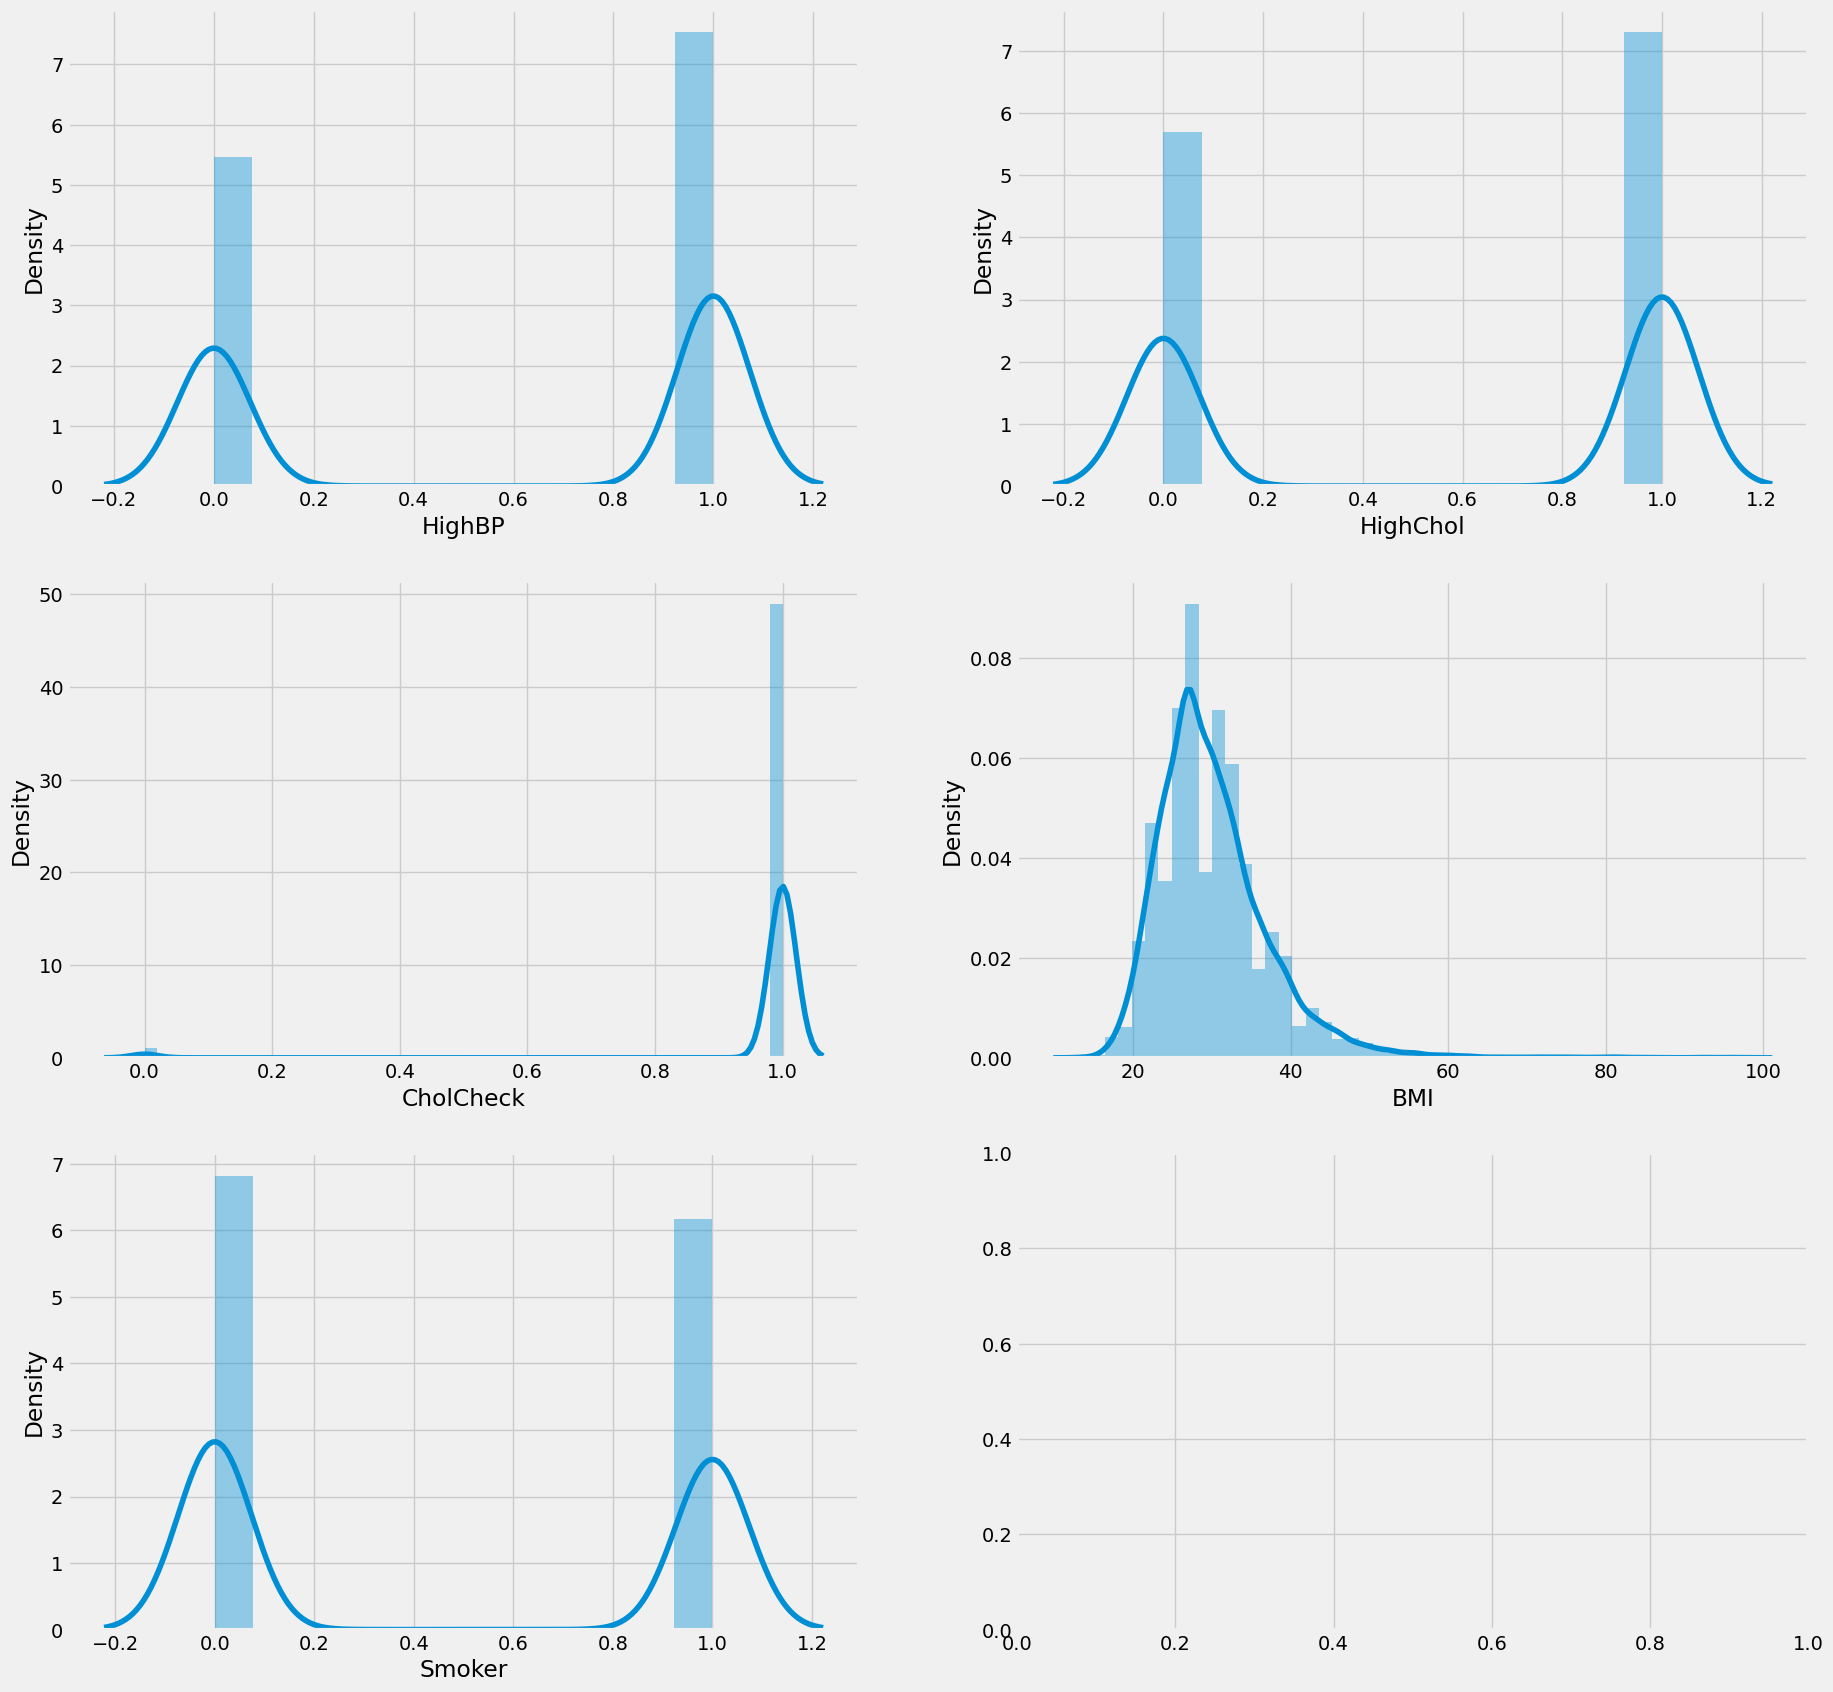

In [ ]:
f, axes = plt.subplots(3,2, figsize=(20,20))
sns.distplot(diabetescomp_df.HighBP, ax=axes[0,0])
sns.distplot(diabetescomp_df.HighChol, ax=axes[0,1])
sns.distplot(diabetescomp_df.CholCheck, ax=axes[1,0])
sns.distplot(diabetescomp_df.BMI, ax=axes[1,1])
sns.distplot(diabetescomp_df.Smoker, ax=axes[2,0])

<ipython-input-224-86b2438d883e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetescomp_df.Stroke, ax=axes[0,0])
<ipython-input-224-86b2438d883e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetescomp_df.HeartDiseaseorAttack, ax=axes[0,1])
<ipython-input-224-86b2438d883e>:4: UserWa

<Axes: xlabel='MentHlth', ylabel='Density'>

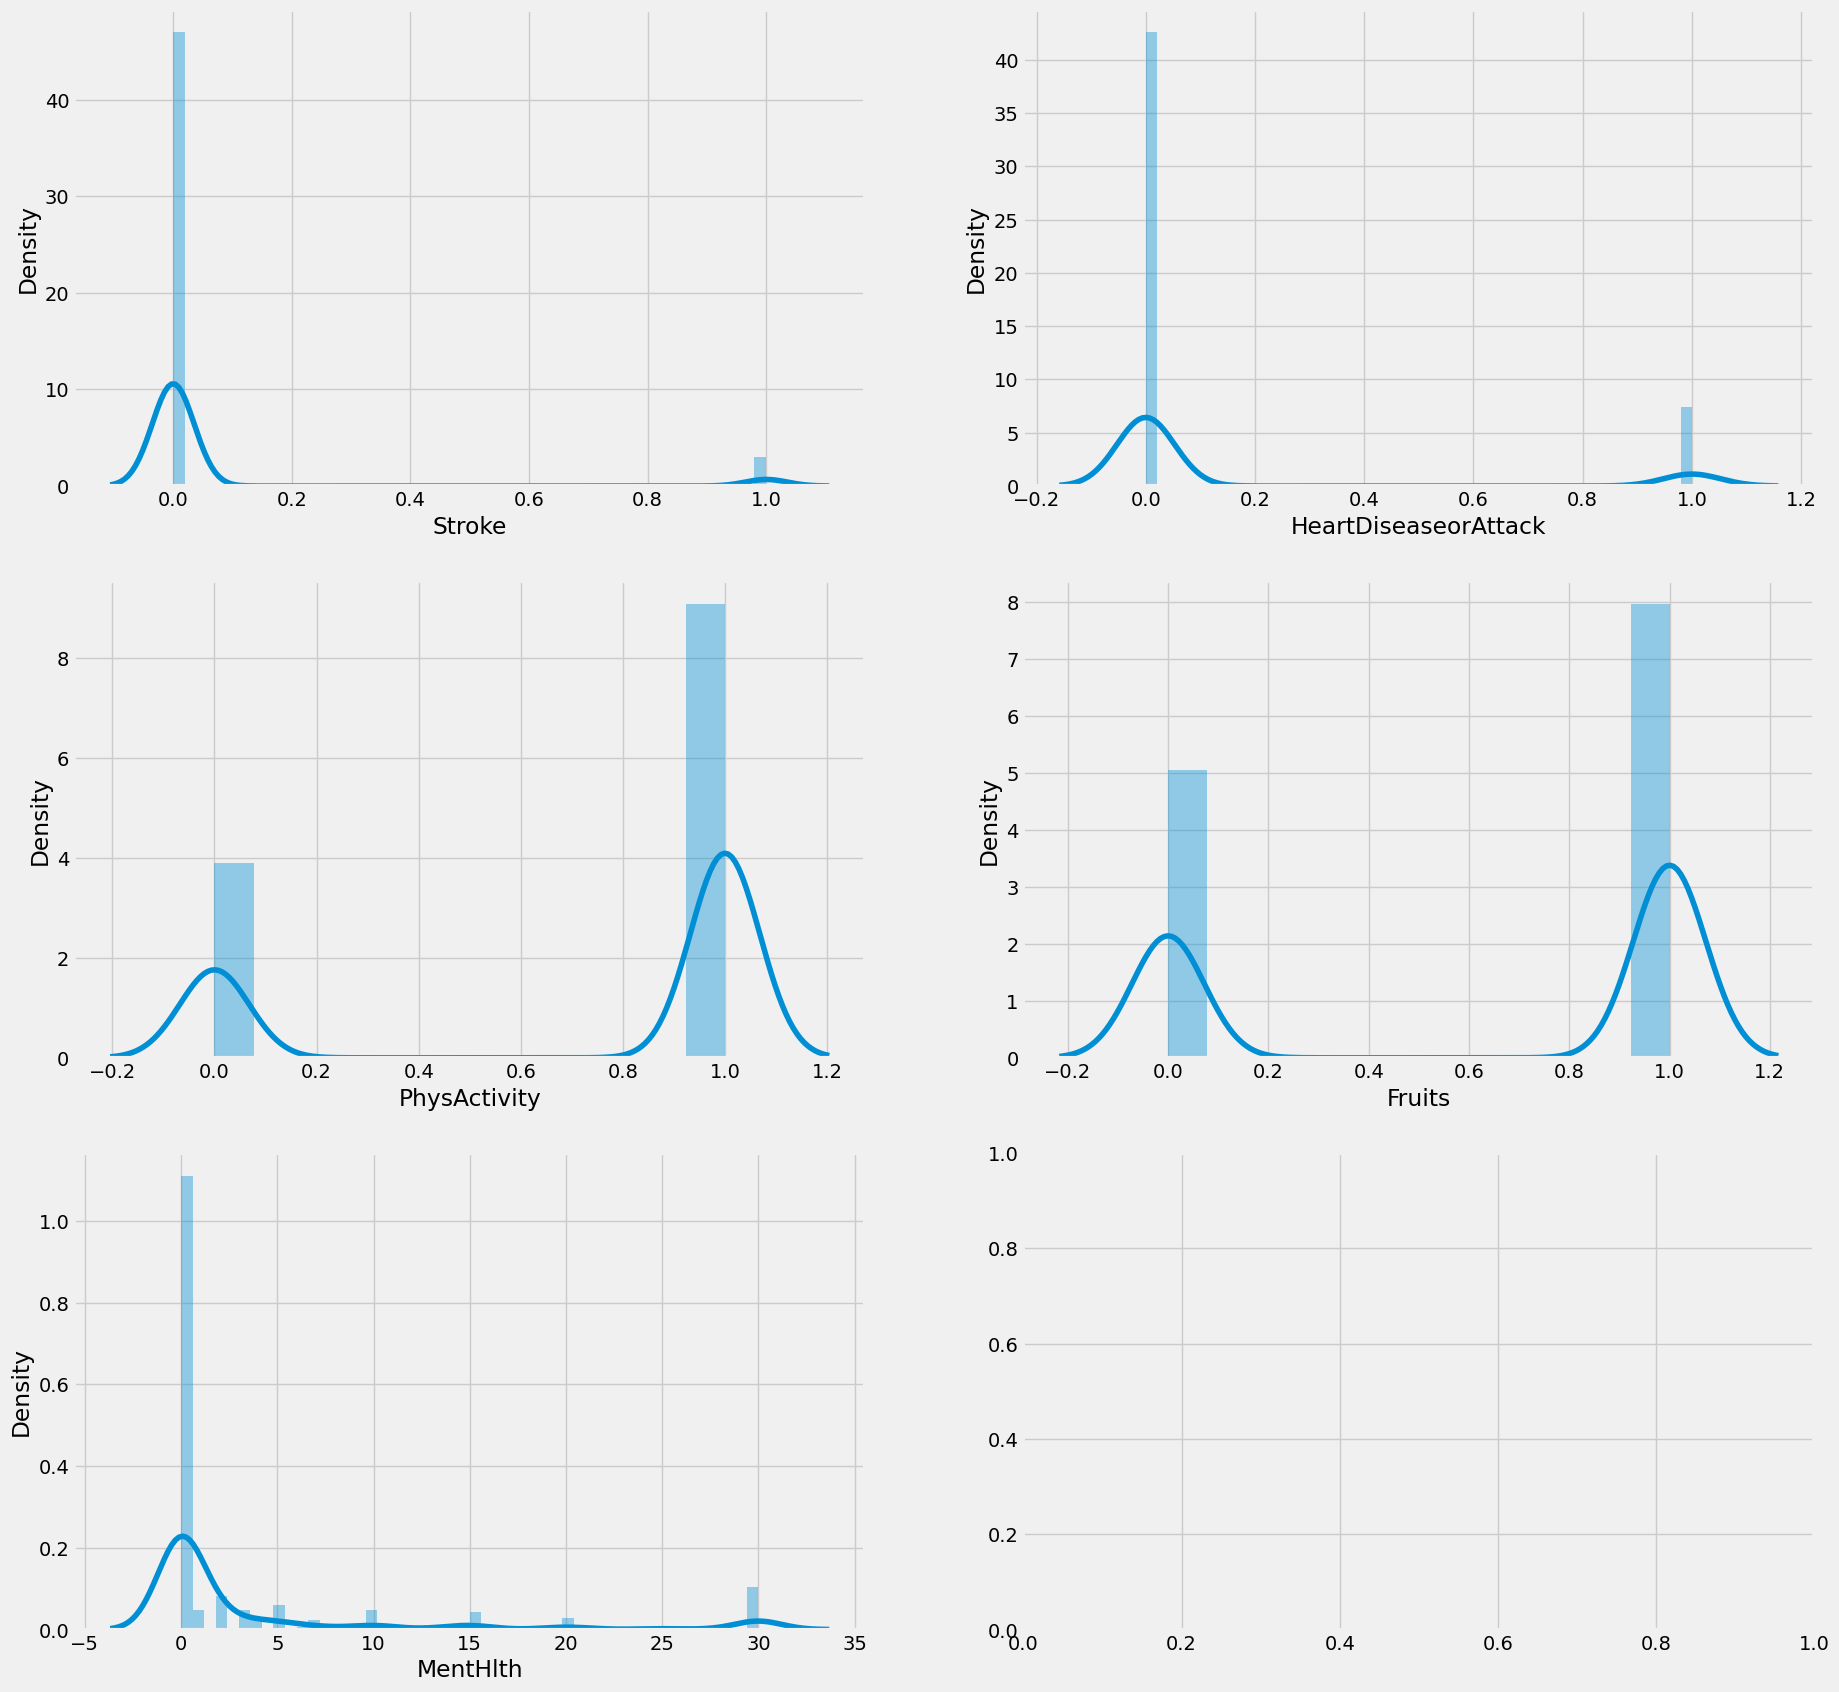

In [ ]:
f, axes = plt.subplots(3,2, figsize=(20,20))
sns.distplot(diabetescomp_df.Stroke, ax=axes[0,0])
sns.distplot(diabetescomp_df.HeartDiseaseorAttack, ax=axes[0,1])
sns.distplot(diabetescomp_df.PhysActivity, ax=axes[1,0])
sns.distplot(diabetescomp_df.Fruits, ax=axes[1,1])
sns.distplot(diabetescomp_df.MentHlth, ax=axes[2,0])


Aqui podemos visualizar la distribucion de valores que existen dentro del set de datos, dentro de estos datos no hay valores con NaN, ni mal codificados

###Bloque 2

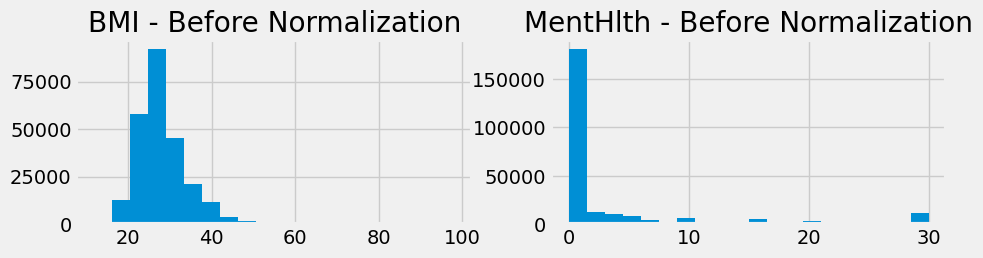

In [ ]:
columns1 = ['BMI', 'MentHlth']

plt.figure(figsize=(10, 5))
for i, column in enumerate(columns1):
    plt.subplot(2, 2, i+1)
    plt.hist(diabetescompbinary_df[column], bins=20)
    plt.title(f"{column} - Before Normalization")

Se revisan algunas estadisticas de interes antes de estandarizar el set de datos

In [ ]:
from sklearn.preprocessing import StandardScaler
columns1 = ['BMI', 'MentHlth']

scaler = StandardScaler()
#Z-score normalization is a method where the
#values are scaled to have a mean of 0 and a standard deviation of 1.

diabetescompbinary_df[columns1] = scaler.fit_transform(diabetescompbinary_df[columns1])

Se estandarizan los datos con el escalador standar de sklearn

In [ ]:
diabetescompbinary_df.describe()


Diabetes_012         HighBP       HighChol      CholCheck  \
count  249049.000000  249049.000000  249049.000000  249049.000000   
mean        0.141924       0.425282       0.420463       0.962224   
std         0.348973       0.494387       0.493634       0.190654   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

                BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  2.490490e+05  249049.000000  249049.000000         249049.000000   
mean  -1.319809e-16       0.442246       0.040261              0.093271   
std    1.000002e+00       0.496654       0.196571              0.290812   
min   -2.477824e+00       0.000000       0.000000              0.000000   
25%   -6.579924e-01       0.000000       0.000000              0.000000   
50%   -2.030345e-01       0.000000       0.000000              0.000000   
75%    4.035760e-01       1.000000       0.000000              0.000000   
max    1.056430e+01       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  249049.000000  249049.000000  ...  249049.000000  249049.000000   
mean        0.757995       0.634851  ...       0.951162       0.083337   
std         0.428298       0.481473  ...       0.215529       0.276392   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth      MentHlth       PhysHlth       DiffWalk  \
count  249049.000000  2.490490e+05  249049.000000  249049.000000   
mean        2.502761 -2.259595e-17       4.202916       0.166192   
std         1.067308  1.000002e+00       8.681035       0.372254   
min         1.000000 -4.281456e-01       0.000000       0.000000   
25%         2.000000 -4.281456e-01       0.000000       0.000000   
50%         2.000000 -4.281456e-01       0.000000       0.000000   
75%         3.000000 -1.571468e-01       3.000000       0.000000   
max         5.000000  3.636837e+00      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  249049.000000  249049.000000  249049.000000  249049.000000  
mean        0.440391       8.012572       5.055379       6.066943  
std         0.496435       3.058090       0.983375       2.066245  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

Se revisa la descripcion de los datos existentes

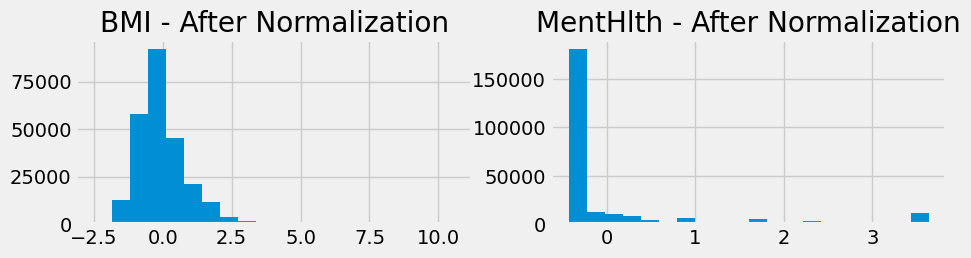

In [ ]:
plt.figure(figsize=(10, 5))
for i, column in enumerate(columns1):
    plt.subplot(2, 2, i+1)
    plt.hist(diabetescompbinary_df[column], bins=20)
    plt.title(f"{column} - After Normalization")

Se revisan las estadisticas de interes despues de estandarizar el set de datos

In [ ]:
correlation_coefficient = diabetescompbinary_df['BMI'].corr(diabetescompbinary_df['MentHlth'])
covariance = diabetescompbinary_df['BMI'].cov(diabetescompbinary_df['MentHlth'])

print(f"Correlation Coefficient (after normalization): {correlation_coefficient}")
print(f"Covariance (after normalization): {covariance}")

Correlation Coefficient (after normalization): 0.0844227392870974
Covariance (after normalization): 0.08442307826889722


El coeficiente de correlacion muestra la fuerza y direccion de la relacion entre 2 variables

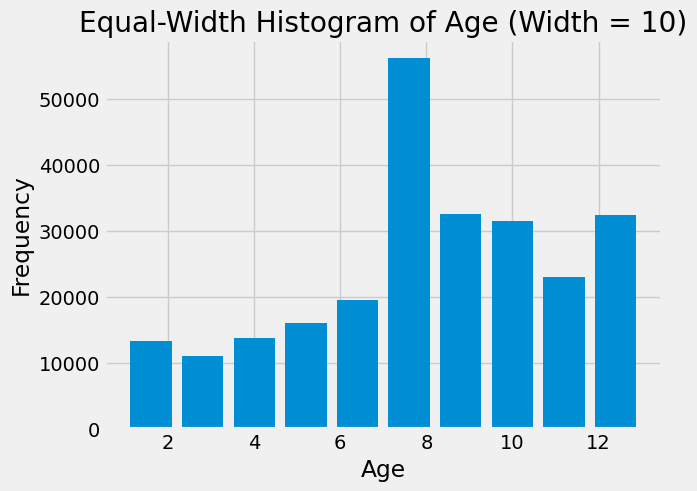

In [ ]:
plt.hist(diabetescompbinary_df['Age'], bins=10,  rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Equal-Width Histogram of Age (Width = 10)')
plt.show()

In [ ]:
bin_depth = 10

# Calculate bin means and mapping them to the 'Age' column
diabetescompbinary_df['Age'] = diabetescompbinary_df['Age'].groupby(diabetescompbinary_df['Age'] // bin_depth * bin_depth).transform('mean')

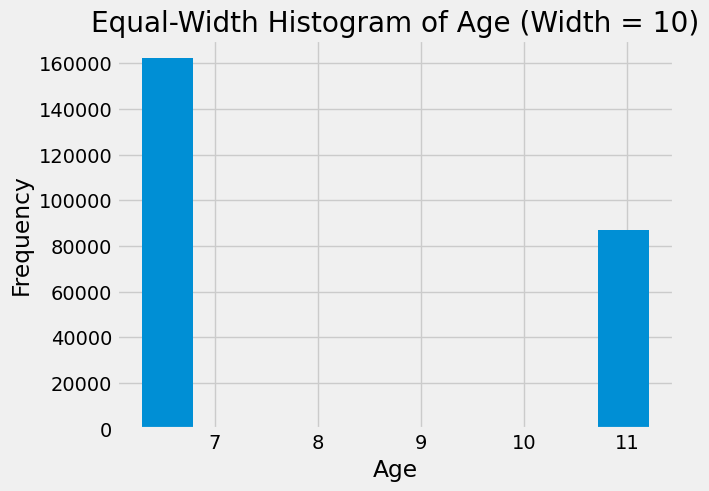

In [ ]:
plt.hist(diabetescompbinary_df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Equal-Width Histogram of Age (Width = 10)')
plt.show()

Se muestra un diagrama de histograma de anchura de 10 para distribuir las edades

In [ ]:
target = diabetescompbinary_df['Diabetes_012'].value_counts()
print(target)

0.0    213703
1.0     35346
Name: Diabetes_012, dtype: int64


Se imprime el conteo de variables en el dataset 2

##Separacion de datos de entrenamiento y prueba

###Bloque 1

In [ ]:
X = diabetescomp_df.drop('Diabetes_012', axis =1).values
y = diabetescomp_df.Diabetes_012.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43, train_size=0.7)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=43)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

En esta linea se separa la salida del estado de diabetes y se establece el porcentaje de prueba como 30% y entrenamiento 70%, posteriormente se les aplica una funcion normalizadora a los datos de X_train, posteriormente se le aplica una division del 50% para motivos de desarrollo y prueba, la misma funcion normalizadora se usa en X_dev

In [ ]:
total_ratio = len(X_train) / (len(X_train) + len(X_test))
total_ratio

0.8235244305190956

###Bloque 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

Xb = diabetescompbinary_df.drop('Diabetes_012', axis=1)  # Features
yb = diabetescompbinary_df['Diabetes_012']  # Diabetes_binary

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.3, random_state=43)

El bloque 2 tiene un estadisticas similares de bloques de pruebas y aprendizaje

##Redes Neuronales

###Modelo 1
4 capas escondidas, 16 neuronas, 0.3 dropout, paciencia 30, min_delta 0.01, 200 epocas, modelo de regression,learning_rate=0.0000001

---


In [ ]:
def nn_regression():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(16, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(16, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(16, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Activation('relu', name='Activation3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(16, name='FC4')(layer)
    layer = BatchNormalization(name='BC4')(layer)
    layer = Dropout(0.3, name='Dropout4')(layer)
    output = Dense(1, name='OutputLayer')(layer) #Se cambia la ulti,a capa para usar regression

    model = Model(inputs=inputs, outputs=output)
    return model


Se definen 3 capas escondidas con 16 neuronas y una salida con activacion softmax


In [ ]:
regression_model1 = nn_regression()
regression_model1.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 10)]              0         
                                                                 
 FC1 (Dense)                 (None, 16)                176       
                                                                 
 BC1 (BatchNormalization)    (None, 16)                64        
                                                                 
 Activation1 (Activation)    (None, 16)                0         
                                                                 
 Dropout1 (Dropout)          (None, 16)                0         
                                                                 
 FC2 (Dense)                 (None, 16)                272       
                                                                 
 BC2 (BatchNormalization)    (None, 16)                64  

Se revisan las especificaciones finales de la red neuronal

In [ ]:
regression_model1.compile(optimizer=Adam(learning_rate=0.0000001), loss='mean_squared_error', metrics=['mean_absolute_error'])
#Adam(learning_rate=0.0000001)

Se compila el modelo con el modulo de perdida binaria, un aprendizaje de 0.1 con metricas de precision

In [ ]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=30, min_delta=0.01)

Se ingresa la funcion RLRoP la cual es un callback que reduce la cantidad de aprendizaje si la metrica ha estado mejorando, esto ayuda al model a converger y escapar el minimo local
Earlystopping es un callback que para el entrenamiento cuando la metrica monitoreada ha parado de mejorar, esto ayuda a prevenir el sobreajuste y previniendo la degradacion del rendimiento

In [ ]:
# Train the model
regression_model1.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_dev, y_dev), batch_size=32, callbacks=[reduce_lr, early_stopping])

Epoch 1/200
304/304 [==============================] - 4s 5ms/step - loss: 5.2570 - mean_absolute_error: 1.6457 - val_loss: 2.2843 - val_mean_absolute_error: 1.2722 - lr: 1.0000e-07
Epoch 2/200
304/304 [==============================] - 1s 4ms/step - loss: 5.1414 - mean_absolute_error: 1.6286 - val_loss: 2.7831 - val_mean_absolute_error: 1.3941 - lr: 1.0000e-07
Epoch 3/200
304/304 [==============================] - 1s 4ms/step - loss: 5.2621 - mean_absolute_error: 1.6553 - val_loss: 2.9289 - val_mean_absolute_error: 1.3918 - lr: 1.0000e-07
Epoch 4/200
304/304 [==============================] - 1s 4ms/step - loss: 5.2420 - mean_absolute_error: 1.6574 - val_loss: 2.9240 - val_mean_absolute_error: 1.3972 - lr: 1.0000e-07
Epoch 5/200
304/304 [==============================] - 1s 4ms/step - loss: 5.3167 - mean_absolute_error: 1.6426 - val_loss: 2.8714 - val_mean_absolute_error: 1.3834 - lr: 1.0000e-07
Epoch 6/200
304/304 [==============================] - 1s 5ms/step - loss: 5.3755 - mean_a

Se establece el modelo con los datos de entrenamiento, 2000 epocas, con datos de validacion y con callbacks RLRoP y early stopping

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = regression_model1.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    if i == 0:
        print('Training set:')
    elif i == 1:
        print('Dev set:')
    else:
        print('Test set:')

    print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                     classification_report(y, y_pred)))

304/304 [==============================] - 1s 4ms/step
Training set:
	Accuracy:0.279
	Classification Report
              precision    recall  f1-score   support

        -3.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.34      0.80      0.48      3270
         1.0       0.31      0.03      0.05      3174
         2.0       0.17      0.00      0.00      3281

    accuracy                           0.28      9725
   macro avg       0.14      0.14      0.09      9725
weighted avg       0.27      0.28      0.18      9725

 1/66 [..............................] - ETA: 3s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


66/66 [==============================] - 0s 3ms/step
Dev set:
	Accuracy:0.278
	Classification Report
              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.34      0.83      0.48       675
         1.0       0.31      0.03      0.05       742
         2.0       0.00      0.00      0.00       667

    accuracy                           0.28      2084
   macro avg       0.13      0.17      0.11      2084
weighted avg       0.22      0.28      0.17      2084

32/66 [=============>................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


66/66 [==============================] - 0s 2ms/step
Test set:
	Accuracy:0.272
	Classification Report
              precision    recall  f1-score   support

        -3.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.34      0.81      0.48       686
         1.0       0.22      0.02      0.03       715
         2.0       1.00      0.00      0.00       683

    accuracy                           0.27      2084
   macro avg       0.26      0.14      0.08      2084
weighted avg       0.52      0.27      0.17      2084



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
history = regression_model1.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_dev, y_dev), batch_size=32, callbacks=[reduce_lr, early_stopping])

Epoch 1/200
304/304 [==============================] - 2s 7ms/step - loss: 5.0606 - mean_absolute_error: 1.6167 - val_loss: 2.9090 - val_mean_absolute_error: 1.3926 - lr: 1.0000e-10
Epoch 2/200
304/304 [==============================] - 2s 7ms/step - loss: 5.2191 - mean_absolute_error: 1.6475 - val_loss: 2.9439 - val_mean_absolute_error: 1.4057 - lr: 1.0000e-10
Epoch 3/200
304/304 [==============================] - 2s 6ms/step - loss: 5.2105 - mean_absolute_error: 1.6473 - val_loss: 2.9835 - val_mean_absolute_error: 1.4010 - lr: 1.0000e-10
Epoch 4/200
304/304 [==============================] - 3s 9ms/step - loss: 5.1861 - mean_absolute_error: 1.6546 - val_loss: 3.0036 - val_mean_absolute_error: 1.4190 - lr: 1.0000e-10
Epoch 5/200
304/304 [==============================] - 3s 9ms/step - loss: 5.1933 - mean_absolute_error: 1.6283 - val_loss: 2.9402 - val_mean_absolute_error: 1.3899 - lr: 1.0000e-10
Epoch 6/200
304/304 [==============================] - 3s 9ms/step - loss: 5.1918 - mean_a

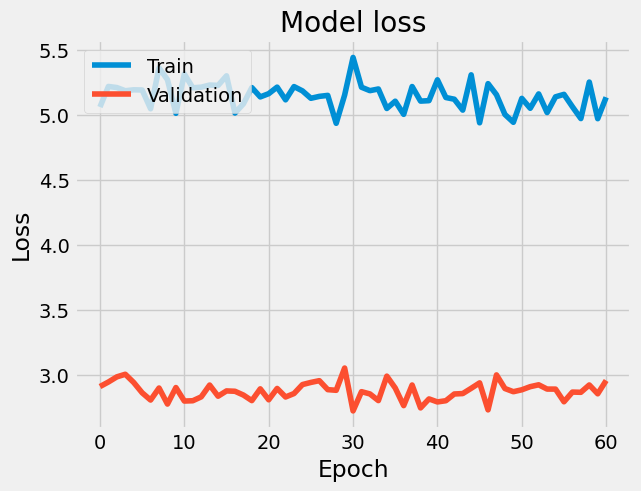

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Estas son las estadisticas modelo de 3 capas escondidas con 16 neuronas, 500 epocas y escalada de aprendizaje 0.1

###Modelo 2
4 capas escondidas, 48-36-24-12 neuronas, 0.3 dropout, paciencia 30, min_delta 0.01,
200 epocas, modelo de regression
learning_rate=0.000001

---

In [ ]:
def nn_regression():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(48, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(36, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(24, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Activation('relu', name='Activation3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(12, name='FC4')(layer)
    layer = BatchNormalization(name='BC4')(layer)
    layer = Dropout(0.3, name='Dropout4')(layer)
    output = Dense(1, name='OutputLayer')(layer) #Se cambia la ulti,a capa para usar regression

    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
regression_model2 = nn_regression()
regression_model2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 10)]              0         
                                                                 
 FC1 (Dense)                 (None, 48)                528       
                                                                 
 BC1 (BatchNormalization)    (None, 48)                192       
                                                                 
 Activation1 (Activation)    (None, 48)                0         
                                                                 
 Dropout1 (Dropout)          (None, 48)                0         
                                                                 
 FC2 (Dense)                 (None, 36)                1764      
                                                                 
 BC2 (BatchNormalization)    (None, 36)                144 

In [ ]:
regression_model2.compile(optimizer=Adam(learning_rate=0.000001), loss='mean_squared_error', metrics=['mean_absolute_error'])
#Adam(learning_rate=0.0000001)

Se compila el modelo con el modulo de perdida binaria, un aprendizaje de 0.1 con metricas de precision

In [ ]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=30, min_delta=0.01)

Se ingresa la funcion RLRoP la cual es un callback que reduce la cantidad de aprendizaje si la metrica ha estado mejorando, esto ayuda al model a converger y escapar el minimo local
Earlystopping es un callback que para el entrenamiento cuando la metrica monitoreada ha parado de mejorar, esto ayuda a prevenir el sobreajuste y previniendo la degradacion del rendimiento

In [ ]:
# Train the model
regression_model2.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_dev, y_dev), batch_size=32, callbacks=[reduce_lr, early_stopping])

Epoch 1/200
304/304 [==============================] - 5s 6ms/step - loss: 3.0601 - mean_absolute_error: 1.3718 - val_loss: 1.4003 - val_mean_absolute_error: 0.9453 - lr: 1.0000e-06
Epoch 2/200
304/304 [==============================] - 2s 6ms/step - loss: 3.0846 - mean_absolute_error: 1.3773 - val_loss: 1.5830 - val_mean_absolute_error: 1.0062 - lr: 1.0000e-06
Epoch 3/200
304/304 [==============================] - 2s 7ms/step - loss: 3.0475 - mean_absolute_error: 1.3765 - val_loss: 1.4731 - val_mean_absolute_error: 0.9739 - lr: 1.0000e-06
Epoch 4/200
304/304 [==============================] - 3s 8ms/step - loss: 3.0682 - mean_absolute_error: 1.3839 - val_loss: 1.4319 - val_mean_absolute_error: 0.9612 - lr: 1.0000e-06
Epoch 5/200
304/304 [==============================] - 3s 10ms/step - loss: 3.0402 - mean_absolute_error: 1.3763 - val_loss: 1.3905 - val_mean_absolute_error: 0.9489 - lr: 1.0000e-06
Epoch 6/200
304/304 [==============================] - 3s 10ms/step - loss: 3.0128 - mean

In [ ]:
history = regression_model2.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_dev, y_dev), batch_size=32, callbacks=[reduce_lr, early_stopping])

Epoch 1/200
304/304 [==============================] - 2s 8ms/step - loss: 2.8955 - mean_absolute_error: 1.3442 - val_loss: 1.3672 - val_mean_absolute_error: 0.9407 - lr: 1.0000e-10
Epoch 2/200
304/304 [==============================] - 3s 8ms/step - loss: 2.9439 - mean_absolute_error: 1.3553 - val_loss: 1.4017 - val_mean_absolute_error: 0.9496 - lr: 1.0000e-10
Epoch 3/200
304/304 [==============================] - 2s 7ms/step - loss: 2.9700 - mean_absolute_error: 1.3599 - val_loss: 1.3971 - val_mean_absolute_error: 0.9482 - lr: 1.0000e-10
Epoch 4/200
304/304 [==============================] - 2s 6ms/step - loss: 2.9710 - mean_absolute_error: 1.3535 - val_loss: 1.4003 - val_mean_absolute_error: 0.9502 - lr: 1.0000e-10
Epoch 5/200
304/304 [==============================] - 1s 5ms/step - loss: 2.9266 - mean_absolute_error: 1.3558 - val_loss: 1.4260 - val_mean_absolute_error: 0.9576 - lr: 1.0000e-10
Epoch 6/200
304/304 [==============================] - 2s 7ms/step - loss: 2.9485 - mean_a

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = regression_model2.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    if i == 0:
        print('Training set:')
    elif i == 1:
        print('Dev set:')
    else:
        print('Test set:')

    print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                     classification_report(y, y_pred)))

304/304 [==============================] - 2s 6ms/step
Training set:
	Accuracy:0.344
	Classification Report
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.34      0.92      0.50      3270
         1.0       0.36      0.10      0.16      3174
         2.0       0.00      0.00      0.00      3281

    accuracy                           0.34      9725
   macro avg       0.18      0.26      0.16      9725
weighted avg       0.23      0.34      0.22      9725



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

66/66 [==============================] - 0s 4ms/step
Dev set:
	Accuracy:0.337
	Classification Report
              precision    recall  f1-score   support

         0.0       0.33      0.93      0.49       675
         1.0       0.39      0.10      0.16       742
         2.0       0.00      0.00      0.00       667

    accuracy                           0.34      2084
   macro avg       0.24      0.34      0.22      2084
weighted avg       0.25      0.34      0.21      2084



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


66/66 [==============================] - 0s 5ms/step
Test set:
	Accuracy:0.339
	Classification Report
              precision    recall  f1-score   support

         0.0       0.33      0.92      0.49       686
         1.0       0.38      0.10      0.16       715
         2.0       0.00      0.00      0.00       683

    accuracy                           0.34      2084
   macro avg       0.24      0.34      0.22      2084
weighted avg       0.24      0.34      0.22      2084



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Modelo 3
4 capas escondidas, 32-16-8 neuronas, 0.3 dropout, paciencia 30, min_delta 0.01,
2500 epocas, learning_rate=0.0000001
Funcion de activacion linear y softmax

---

In [ ]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(36, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(24, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(12, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(6, name='FC4')(layer)
    layer = BatchNormalization(name='BC4')(layer)
    layer = Dropout(0.3, name='Dropout4')(layer)
    layer = Dense(3, name='OutLayer')(layer)
    layer = Activation('softmax', name='softmax')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [ ]:
modelcomp3 = nn()
modelcomp3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 10)]              0         
                                                                 
 FC1 (Dense)                 (None, 36)                396       
                                                                 
 BC1 (BatchNormalization)    (None, 36)                144       
                                                                 
 Dropout1 (Dropout)          (None, 36)                0         
                                                                 
 FC2 (Dense)                 (None, 24)                888       
                                                                 
 BC2 (BatchNormalization)    (None, 24)                96        
                                                                 
 Dropout2 (Dropout)          (None, 24)                0   

In [ ]:
modelcomp3.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0000001), metrics=['accuracy'])

Se compila el modelo con el modulo de perdida binaria, un aprendizaje de 0.1 con metricas de precision

In [ ]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=30, min_delta=0.001)

Se ingresa la funcion RLRoP la cual es un callback que reduce la cantidad de aprendizaje si la metrica ha estado mejorando, esto ayuda al model a converger y escapar el minimo local
Earlystopping es un callback que para el entrenamiento cuando la metrica monitoreada ha parado de mejorar, esto ayuda a prevenir el sobreajuste y previniendo la degradacion del rendimiento

In [ ]:
modelcomp3.fit(x=X_train, y=y_train, epochs=8000, validation_data=(X_dev, y_dev), callbacks=[reduce_lr, early_stopping], verbose=0)

In [ ]:
history = modelcomp3.fit(x=X_train, y=y_train, epochs=8000, validation_data=(X_dev, y_dev), callbacks=[reduce_lr, early_stopping], verbose=0)

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = modelcomp3.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    if i == 0:
        print('Training set:')
    elif i == 1:
        print('Dev set:')
    else:
        print('Test set:')

    print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                     classification_report(y, y_pred)))

304/304 [==============================] - 1s 2ms/step
Training set:
	Accuracy:0.341
	Classification Report
              precision    recall  f1-score   support

         0.0       0.34      0.95      0.50      3270
         1.0       0.25      0.00      0.00      3174
         2.0       0.36      0.06      0.11      3281

    accuracy                           0.34      9725
   macro avg       0.32      0.34      0.20      9725
weighted avg       0.32      0.34      0.20      9725

66/66 [==============================] - 0s 3ms/step
Dev set:
	Accuracy:0.332
	Classification Report
              precision    recall  f1-score   support

         0.0       0.33      0.97      0.49       675
         1.0       0.00      0.00      0.00       742
         2.0       0.38      0.06      0.10       667

    accuracy                           0.33      2084
   macro avg       0.24      0.34      0.20      2084
weighted avg       0.23      0.33      0.19      2084

18/66 [=======>..............

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


66/66 [==============================] - 0s 3ms/step
Test set:
	Accuracy:0.340
	Classification Report
              precision    recall  f1-score   support

         0.0       0.34      0.97      0.50       686
         1.0       0.00      0.00      0.00       715
         2.0       0.37      0.07      0.11       683

    accuracy                           0.34      2084
   macro avg       0.24      0.34      0.20      2084
weighted avg       0.23      0.34      0.20      2084



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


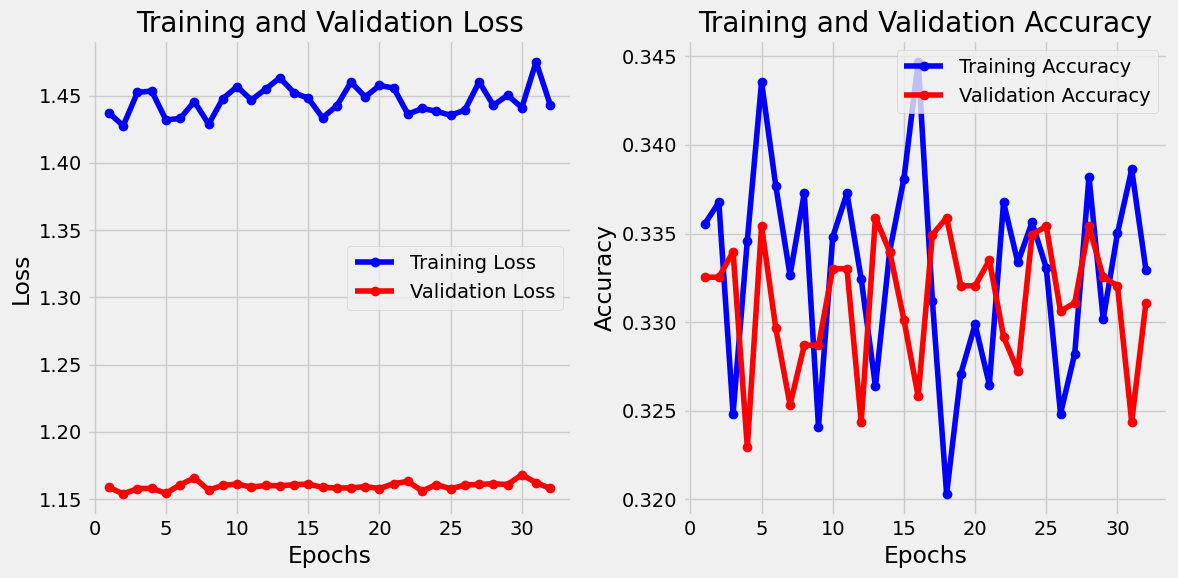

In [ ]:
def plot_learning_curve(history):
    # Extracting training and validation loss values
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    # Extracting training and validation accuracy values
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    # Get the number of epochs
    epochs = range(1, len(training_loss) + 1)

    # Plotting the training and validation loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting the training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming 'history' is the object returned by the model.fit() function
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)
# where X_train, y_train, X_val, y_val are your training and validation data
# num_epochs is the number of training epochs, and batch_size is the size of each training batch

# Example usage:
plot_learning_curve(history)

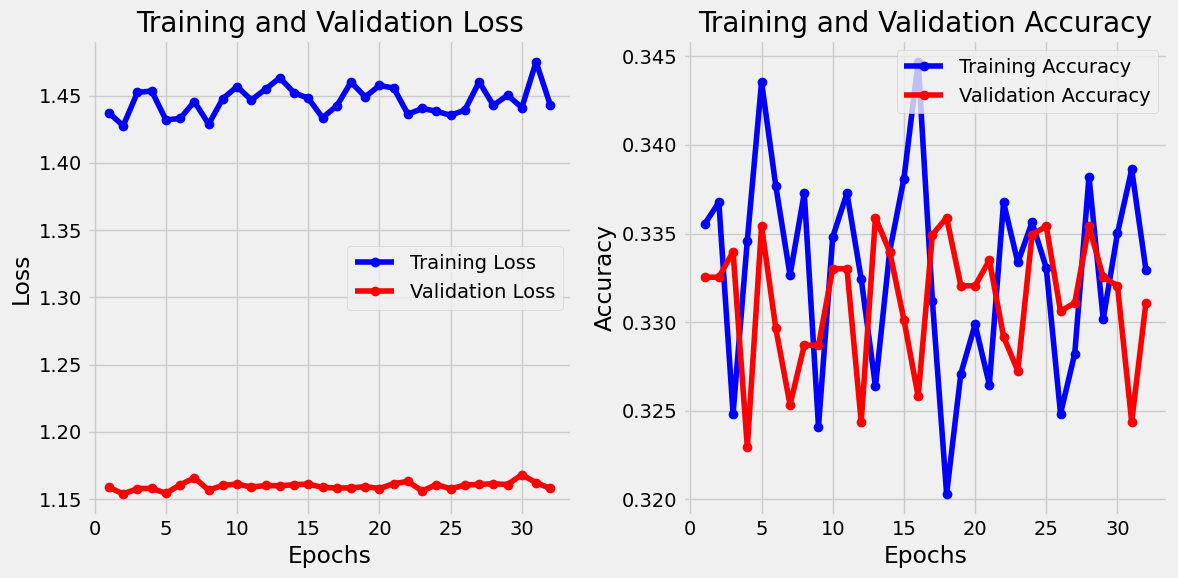

In [ ]:
plot_learning_curve(history)


###Modelo 4
3 capas escondidas, 16 neuronas, 0.3 dropout, paciencia 30, min_delta 0.01, 500 epocas

---

In [ ]:
modelbin = LogisticRegression()
modelbin.fit(X_trainb, y_trainb)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Se va a utilizar regresion logistica para dar predeccion

In [ ]:
predictions = modelbin.predict(X_testb)
predictions

array([0., 0., 0., ..., 0., 0., 0.])

Se ajusta el modelo y se asignan los valores a la variable prediccion

In [ ]:
# Evaluate the model using accuracy and F1 score
accuracy = accuracy_score(y_testb, predictions)
f1 = f1_score(y_testb, predictions)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8615672890316536
F1 Score: 0.2630566441040256


Se muestran las estadisticas de prediccion obtenidas

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_testb, predictions)
print(report)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     64043
         1.0       0.55      0.17      0.26     10672

    accuracy                           0.86     74715
   macro avg       0.71      0.57      0.59     74715
weighted avg       0.83      0.86      0.83     74715



Se muestran las estadisticas de prediccion obtenidas, mas a detalle incluyendo los promedios

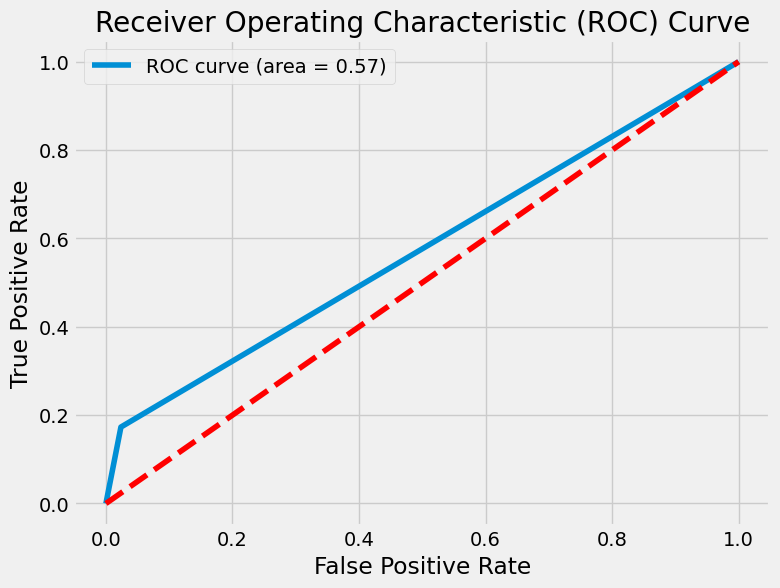

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_testb, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_testb, predictions))
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##Estadisticas de modelos

###Modelo 1
4 capas escondidas, 16 neuronas, 0.3 dropout, paciencia 30, min_delta 0.01, 200 epocas, modelo de regression,learning_rate=0.0000001

---


In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = regression_model1.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    if i == 0:
        print('Training set:')
    elif i == 1:
        print('Dev set:')
    else:
        print('Test set:')

    print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                     classification_report(y, y_pred)))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


###Modelo 2
4 capas escondidas, 48-36-24-12 neuronas, 0.3 dropout, paciencia 30, min_delta 0.01,
200 epocas, modelo de regression
learning_rate=0.000001

---

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = regression_model2.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    if i == 0:
        print('Training set:')
    elif i == 1:
        print('Dev set:')
    else:
        print('Test set:')

    print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                     classification_report(y, y_pred)))

###Modelo 3
4 capas escondidas, 32-16-8 neuronas, 0.1 dropout, paciencia 25, min_delta 0.01,
2500 epocas, learning_rate=0.0000001
Funcion de activacion linear y softmax

---

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = modelcomp3.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    if i == 0:
        print('Training set:')
    elif i == 1:
        print('Dev set:')
    else:
        print('Test set:')

    print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                     classification_report(y, y_pred)))

In [ ]:
plot_learning_curve(history)


In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i, (x, y) in enumerate(zip(x_lst, y_lst)):
    y_pred = modelcomp3.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    if i == 0:
        print('Training set:')
    elif i == 1:
        print('Dev set:')
    else:
        print('Test set:')

    # Exclude the value 1 from the classification report
    labels_to_exclude = []
    labels_to_include = [label for label in np.unique(y) if label not in labels_to_exclude]

    print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                     classification_report(y, y_pred, labels=labels_to_include)))

304/304 [==============================] - 1s 2ms/step
Training set:
	Accuracy:0.341
	Classification Report
              precision    recall  f1-score   support

         0.0       0.34      0.95      0.50      3270
         1.0       0.25      0.00      0.00      3174
         2.0       0.36      0.06      0.11      3281

    accuracy                           0.34      9725
   macro avg       0.32      0.34      0.20      9725
weighted avg       0.32      0.34      0.20      9725

66/66 [==============================] - 0s 2ms/step
Dev set:
	Accuracy:0.332
	Classification Report
              precision    recall  f1-score   support

         0.0       0.33      0.97      0.49       675
         1.0       0.00      0.00      0.00       742
         2.0       0.38      0.06      0.10       667

    accuracy                           0.33      2084
   macro avg       0.24      0.34      0.20      2084
weighted avg       0.23      0.33      0.19      2084

66/66 [======================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test set:
	Accuracy:0.340
	Classification Report
              precision    recall  f1-score   support

         0.0       0.34      0.97      0.50       686
         1.0       0.00      0.00      0.00       715
         2.0       0.37      0.07      0.11       683

    accuracy                           0.34      2084
   macro avg       0.24      0.34      0.20      2084
weighted avg       0.23      0.34      0.20      2084



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Modelo 4
3 capas escondidas, 16 neuronas, 0.3 dropout, paciencia 30, min_delta 0.01, 500 epocas

---

In [ ]:
accuracy = accuracy_score(y_testb, predictions)
f1 = f1_score(y_testb, predictions)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8615672890316536
F1 Score: 0.2630566441040256


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_testb, predictions)
print(report)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     64043
         1.0       0.55      0.17      0.26     10672

    accuracy                           0.86     74715
   macro avg       0.71      0.57      0.59     74715
weighted avg       0.83      0.86      0.83     74715



Tenemos una precision del 80% pero un F1 score muy bajo a lo cual hace el modelo substancialmente menos confiable

##Conclusion

La implementacion de este proyecto secundario muestra 4 modelos con rasgos variantes y formas de resolucion, uno de control y 2 modelos que evolucionan tanto en profundidad y extension de sus capas de neuronas y la cantidad de sus epocas.

En el modelo 1 (regression) no predice en ocasiones alguna valor para detectar el valor de diabetes y tiene porcentajes de precision extremadamente bajos

El modelo 2 (regression neuronas por capa) tiene mayor los mismos problemas que el modelo 1 e incluso menor capacidad de prediccion

El modelo 3 (sin funcion de activacion intermedia, solo softmax) tiene mayor consistencia en sus 3 puntajes f1 de sus sets de datos pero al perecer la informacion de que se le da al algoritmo es bastante similar a lo cual arroja precisiones del 33% o ligeramente mayores

El modelo 4 (binario) tiene una mayor precision en cuanto a predecir la no diabetes.